# Curiosity Incidental Preference Analyses

### Summary of Main Findings:


## Set-Up

In [1]:
# load required packages/libraries
import pandas as pd
import os
import json
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import fuzz
from pymer4.models import Lmer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ttest_1samp, norm
from scipy import stats
from scipy.special import expit
import resmem
from resmem import ResMem, transformer



# set working directory
os.chdir('/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference') 

## Make dictionaries

#### Accuracy (pointy/rounded) dictionary
This is a dictionary including the "correct" pointy/rounded judgement based on human scoring by Abby, Carolyn, and Bonnie in Spring 2025.

In [2]:
# make "accuracy" dictionary based on human RA ratings
accuracy_dict = {
    'novel001.jpg': 'rounded',
    'novel003.jpg': 'pointy',
    'novel004.jpg': 'pointy',
    'novel005.jpg': 'pointy',
    'novel010.jpg': 'rounded',
    'novel011.jpg': 'pointy',
    'novel013.jpg': 'pointy',
    'novel014.jpg': 'rounded',
    'novel015.jpg': 'pointy',
    'novel017.jpg': 'rounded',
    'novel019.jpg': 'pointy',
    'novel022.jpg': 'pointy',
    'novel027.jpg': 'rounded',
    'novel031.jpg': 'pointy',
    'novel032.jpg': 'rounded',
    'novel033.jpg': 'rounded',
    'novel037.jpg': 'rounded',
    'novel046.jpg': 'rounded',
    'novel049.jpg': 'rounded',
    'novel056.jpg': 'pointy',
    'novel058.jpg': 'rounded',
    'novel059.jpg': 'rounded',
    'novel064.jpg': 'rounded',
    'novel067.jpg': 'rounded',
    'novel069.jpg': 'rounded',
    'novel071.jpg': 'rounded',
    'novel073.jpg': 'rounded',
    'novel075.jpg': 'pointy',
    'novel076.jpg': 'rounded',
    'novel077.jpg': 'rounded',
    'novel078.jpg': 'pointy',
    'novel079.jpg': 'pointy',
    'novel080.jpg': 'rounded',
    'novel082.jpg': 'rounded',
    'novel085.jpg': 'rounded',
    'novel087.jpg': 'rounded',
    'novel088.jpg': 'rounded',
    'novel090.jpg': 'pointy',
    'novel091.jpg': 'rounded',
    'novel092.jpg': 'rounded',
    'novel093.jpg': 'rounded',
    'novel094.jpg': 'rounded',
    'novel095.jpg': 'rounded',
    'novel097.jpg': 'rounded',
    'novel098.jpg': 'rounded',
    'novel102.jpg': 'rounded',
    'novel103.jpg': 'pointy',
    'novel104.jpg': 'rounded',
    'novel105.jpg': 'rounded',
    'novel106.jpg': 'rounded',
    'novel107.jpg': 'pointy',
    'novel108.jpg': 'rounded',
    'novel109.jpg': 'pointy',
    'novel115.jpg': 'rounded',
    'novel118.jpg': 'pointy',
    'novel120.jpg': 'pointy',
    'novel122.jpg': 'rounded',
    'novel123.jpg': 'pointy',
    'novel124.jpg': 'pointy',
    'novel127.jpg': 'rounded',
    'novel129.jpg': 'rounded',
    'novel130.jpg': 'rounded',
    'novel131.jpg': 'rounded',
    'novel132.jpg': 'rounded',
    'novel133.jpg': 'rounded',
    'novel135.jpg': 'rounded',
    'novel136.jpg': 'rounded',
    'novel137.jpg': 'rounded',
    'novel138.jpg': 'rounded',
    'novel139.jpg': 'rounded',
    'novel140.jpg': 'pointy',
    'novel147.jpg': 'rounded',
    'novel149.jpg': 'pointy',
    'novel150.jpg': 'pointy',
    'novel151.jpg': 'pointy',
    'novel152.jpg': 'rounded',
    'novel155.jpg': 'rounded',
    'novel160.jpg': 'pointy',
    'novel161.jpg': 'rounded',
    'novel163.jpg': 'rounded',
    'novel164.jpg': 'rounded',
    'novel166.jpg': 'rounded',
    'novel168.jpg': 'rounded',
    'novel169.jpg': 'rounded',
    'novel171.jpg': 'rounded',
    'novel172.jpg': 'rounded',
    'novel173.jpg': 'pointy',
    'novel174.jpg': 'pointy',
    'novel176.jpg': 'rounded',
    'novel178.jpg': 'rounded',
    'novel182.jpg': 'rounded',
    'novel183.jpg': 'rounded',
    'novel185.jpg': 'pointy',
    'novel186.jpg': 'rounded',
    'novel187.jpg': 'pointy',
    'novel188.jpg': 'rounded',
    'novel189.jpg': 'rounded',
    'novel190.jpg': 'rounded',
    'novel191.jpg': 'rounded',
    'novel192.jpg': 'pointy',
    'novel193.jpg': 'rounded',
    'novel198.jpg': 'pointy',
    'novel199.jpg': 'rounded',
    'novel202.jpg': 'rounded',
    'novel203.jpg': 'rounded',
    'novel205.jpg': 'pointy',
    'novel207.jpg': 'rounded',
    'novel208.jpg': 'rounded',
    'novel209.jpg': 'pointy',
    'novel210.jpg': 'rounded',
    'novel213.jpg': 'rounded',
    'novel215.jpg': 'pointy',
    'novel216.jpg': 'rounded',
    'novel217.jpg': 'rounded',
    'novel220.jpg': 'pointy',
    'novel221.jpg': 'pointy',
    'novel222.jpg': 'rounded',
    'novel224.jpg': 'rounded',
    'novel226.jpg': 'pointy',
    'novel227.jpg': 'rounded',
    'novel228.jpg': 'rounded',
    'novel229.jpg': 'rounded',
    'novel230.jpg': 'pointy',
    'novel233.jpg': 'pointy',
    'novel234.jpg': 'pointy',
    'novel238.jpg': 'pointy',
    'novel239.jpg': 'rounded',
    'novel243.jpg': 'rounded',
    'novel244.jpg': 'rounded',
    'novel252.jpg': 'pointy',
    'novel257.jpg': 'rounded',
    'novel260.jpg': 'pointy',
    'novel262.jpg': 'rounded',
    'novel263.jpg': 'pointy',
    'novel264.jpg': 'rounded',
    'novel265.jpg': 'rounded',
    'novel266.jpg': 'rounded',
    'novel268.jpg': 'rounded',
    'novel269.jpg': 'rounded',
    'novel270.jpg': 'rounded',
    'novel271.jpg': 'rounded',
    'novel272.jpg': 'pointy',
    'novel273.jpg': 'rounded',
    'novel275.jpg': 'rounded',
    'novel276.jpg': 'rounded',
    'novel283.jpg': 'rounded',
    'novel286.jpg': 'pointy',
    'novel287.jpg': 'rounded',
    'novel288.jpg': 'rounded',
    'novel290.jpg': 'rounded',
    'novel294.jpg': 'pointy',
    'novel295.jpg': 'rounded',
    'novel296.jpg': 'rounded',
    'novel303.jpg': 'rounded',
    'novel305.jpg': 'rounded',
    'novel308.jpg': 'rounded',
    'novel309.jpg': 'rounded',
    'novel310.jpg': 'rounded',
    'novel312.jpg': 'pointy',
    'novel316.jpg': 'rounded',
    'novel317.jpg': 'pointy',
    'novel318.jpg': 'rounded',
    'novel321.jpg': 'pointy',
    'novel323.jpg': 'rounded',
    'novel324.jpg': 'rounded',
    'novel325.jpg': 'rounded',
    'novel328.jpg': 'pointy',
    'novel330.jpg': 'rounded',
    'novel334.jpg': 'rounded',
    'novel335.jpg': 'rounded',
    'novel337.jpg': 'rounded',
    'novel338.jpg': 'rounded',
    'novel339.jpg': 'rounded',
    'novel342.jpg': 'rounded',
    'novel343.jpg': 'rounded',
    'novel344.jpg': 'rounded',
    'novel345.jpg': 'pointy',
    'novel346.jpg': 'rounded',
    'novel347.jpg': 'rounded',
    'novel350.jpg': 'rounded',
    'novel351.jpg': 'rounded',
    'novel356.jpg': 'pointy',
    'novel358.jpg': 'rounded',
    'novel359.jpg': 'rounded',
    'novel361.jpg': 'rounded',
    'novel363.jpg': 'rounded',
    'novel367.jpg': 'pointy',
    'novel368.jpg': 'pointy',
    'novel370.jpg': 'rounded',
    'novel371.jpg': 'rounded',
    'novel374.jpg': 'pointy',
    'novel376.jpg': 'rounded',
    'novel377.jpg': 'pointy',
    'novel379.jpg': 'rounded',
    'novel387.jpg': 'rounded',
    'novel388.jpg': 'pointy',
    'novel393.jpg': 'rounded',
    'novel394.jpg': 'rounded',
    'novel395.jpg': 'rounded',
    'novel396.jpg': 'rounded'
}

In [3]:
# IMAGINE dataset ratings dictionaries
# Make dictionaries for the interest, familiarity, and appeal of each novel image, based on IMAGINE data

### data cleaning
# load in ratings data
imagine_ratings = pd.read_csv('/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/methods/IMAGINE_ratings.tsv', sep = '\t')

# filter ratings df to only include novel
imagine_ratings = imagine_ratings[imagine_ratings['Filename'].str.startswith('novel')] 

# only include relevant columns
imagine_ratings = imagine_ratings[['Filename','AverageFamiliarity','AverageInterest','AverageAppeal']]

# update Filename to have '.jpg' at the end to match the images in the data
imagine_ratings['Filename'] = imagine_ratings['Filename'] + '.jpg'

### make dictionaries
fam_dict = dict(zip(imagine_ratings['Filename'], imagine_ratings['AverageFamiliarity']))
int_dict = dict(zip(imagine_ratings['Filename'], imagine_ratings['AverageInterest']))
app_dict = dict(zip(imagine_ratings['Filename'], imagine_ratings['AverageAppeal']))

#### ResMem dictionary

Needell, C. D., & Bainbridge, W. A. (2022). Embracing New Techniques in Deep Learning for Estimating Image Memorability. Computational Brain & Behavior. https://doi.org/10.1007/s42113-022-00126-5 

https://pypi.org/project/resmem/

In [4]:
from PIL import Image
# path to images
img_folder_path = '/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/methods/used_IMAGINE_jpg_only'

# create empty list to store image objects
images = []

# loop through all image files in the folder
for filename in os.listdir(img_folder_path):
    image_path = os.path.join(img_folder_path, filename)
    img = Image.open(image_path)
    images.append(img)

In [5]:
from PIL import Image

# path to images
img_folder_path = '/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/methods/used_IMAGINE_jpg_only'

# create empty list to store image objects
images = []

# loop through all image files in the folder
for filename in os.listdir(img_folder_path):
    image_path = os.path.join(img_folder_path, filename)
    img = Image.open(image_path)
    images.append((filename, img))

# load ResMem model
resmem_model = ResMem(pretrained=True)
# set the model to inference mode
resmem_model.eval() 

# create dictionary to store the image filename and ResMem score
resmem_scores = {}

# loop through all images, find ResMem score, and store in dataframe
for filename, img in images:
    img = img.convert('RGB') # convert image into RGB

    # run preprocessing function
    image_x = transformer(img)
    
    # get ResMem prediction
    prediction = resmem_model(image_x.view(-1, 3, 227, 227))

    # store name and ResMem score in dictionary
    resmem_scores[filename] = prediction.item()

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [6]:
# check dictionary accuracy
resmem_scores['novel160.jpg']

0.7958009839057922

## Data wrangling/cleaning

1. Load in data for all participants
2. Clean data, splitting it into 3 separate dataframes, one for each task
3. Clean each task df, including necessary information for analyses

In [294]:
# ##### this is the cleaning code for 1 participant; see loop for doing this for all participants below
# # load in part 2 data
# all_pt2_data = pd.read_csv(f'/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/data/pilot_data/part_2_data/curiosity-pref-pt2_PIL027.csv'
# )
# all_pt2_data

# # extract subject_id (takes first non-null value in subject_id column)
# subject_id = all_pt2_data['subject_id'].dropna().iloc[0]



# ### general data cleaning
# # convert string "null" to NaN (pandas' way of representing missing values)
# all_pt2_data = all_pt2_data.replace("null", np.nan)

# # ensure 'rt' column is numeric
# all_pt2_data['rt'] = pd.to_numeric(all_pt2_data['rt'], errors='coerce')

# ### separate part 2 data into recall, recog, and choice trials 
# all_recall_data = all_pt2_data[all_pt2_data['task_type'] == 'recall'].copy()
# all_recog_data = all_pt2_data[all_pt2_data['task_type'] == 'recognition'].copy()
# all_choice_data = all_pt2_data[all_pt2_data['task_type'] == 'choice'].copy()



# ### add in judgement ratings from part 1
# # load in subject's judgement responses from part 1
# jud_responses_df = pd.read_csv(f'{subject_id}_judgement_responses.csv')

# # create a dictionary mapping image to response for faster lookup
# judgement_dict = dict(zip(jud_responses_df['image'], jud_responses_df['response']))

# # add judgement responses to recognition df
# all_recog_data['subject_jud'] = all_recog_data['image'].map(judgement_dict)

# # create a dictionary mapping image to encoding rt for faster lookup
# encoding_rt_dict = dict(zip(jud_responses_df['image'], jud_responses_df['rt']))

# # add encoding rts to recognition df
# all_recog_data['encoding_rt'] = all_recog_data['image'].map(encoding_rt_dict)



# ### clean recall df
# # remove unneccessary columns
# recall_cols = ['subject_id', 'trial_index', 'task_order', 'task_type', 'question_number', 'question', 'correct_answer', 'subject_answer', 'curiosity_label', 'rt']
# all_recall_data = all_recall_data[recall_cols]

# # update column names and datatypes
# all_recall_data['trial_index'] = all_recall_data['trial_index'].astype(int)
# all_recall_data['question_number'] = all_recall_data['question_number'].astype(int)
# all_recall_data = all_recall_data.rename(columns={
#     'question_number': 'trial_num',
#     'curiosity_label': 'curiosity_type',
#     'subject_answer': 'subject_response'
# })

# ## use packages to determine accuracy for recall responses
# ## using rapidfuzz
# # define a function to compute fuzzy match score and determine accuracy
# def check_fuzzy_accuracy(correct, response, threshold=8):
#     if pd.isna(correct) or pd.isna(response):
#         return np.nan
#     score = fuzz.ratio(correct.lower().strip(), response.lower().strip())
#     return int(score >= threshold)

# # apply it to your recall data
# all_recall_data['recall_accuracy'] = all_recall_data.apply(
#     lambda row: check_fuzzy_accuracy(row['correct_answer'], row['subject_response']),
#     axis=1
# )


# ### clean recog df
# # remove unneccessary columns
# recog_cols = ['subject_id', 'trial_index', 'task_order', 'task_type', 'trial_number', 'image', 'image_type', 'response', 'key_pressed','subject_response', 'accuracy', 'curiosity_label', 'rt', 'subject_jud']
# all_recog_data = all_recog_data[recog_cols]

# # update column names and datatypes
# all_recog_data['accuracy'] = all_recog_data['accuracy'].astype(int)
# all_recog_data['trial_index'] = all_recog_data['trial_index'].astype(int)
# all_recog_data['trial_number'] = all_recog_data['trial_number'].astype(int)
# all_recog_data = all_recog_data.rename(columns={
#     'trial_number': 'trial_num',
#     'curiosity_label': 'curiosity_type'
# })

# # fill in no-curiosity values
# all_recog_data['curiosity_type'] = np.where(all_recog_data['image_type'] == 'new',
#     'no-curiosity',
#     all_recog_data['curiosity_type']
# )

# # create jud_accuracy column (1 if correct, 0 if wrong or no response)
# # add correct judgement answers
# all_recog_data['correct_jud'] = all_recog_data['image'].map(accuracy_dict)

# # initialize all rows with 0 (not accurate)
# all_recog_data['jud_accuracy'] = 0
# # only set to 1 if response matches correct_answer
# mask = (all_recog_data['subject_jud'] == all_recog_data['correct_jud'])
# all_recog_data.loc[mask, 'jud_accuracy'] = 1
# # set jud_accuracy to NaN for new images
# all_recog_data.loc[all_recog_data['image_type'] == 'new', 'jud_accuracy'] = np.nan



# ### clean choice df
# # drop non-choice rows
# all_choice_data = all_choice_data.dropna(subset = ['pair_type'])

# # add trial number (column count up from 1)
# all_choice_data['trial_num'] = range(1, len(all_choice_data) + 1)

# choice_cols = ['subject_id','trial_index','task_order','task_type', 'rt', 'trial_num', 'pair_type','left_image','right_image','left_label','right_label','chosenImage','chosenLabel']
# all_choice_data = all_choice_data[choice_cols]

# # add chosen side... where it looks to see if the chosen image was the right_image or left_image
# all_choice_data['chosen_side'] = all_choice_data.apply(lambda row: 'left' if row['chosenImage'] == row['left_image'] else 'right', axis = 1)

# # turn chosen side column into choose_r
# all_choice_data['choose_r'] = all_choice_data['chosen_side'].apply(lambda x: 1 if x == 'right' else 0)

# # place coding values for left and right images
# all_choice_data['l_value'] = all_choice_data['left_label'].apply(lambda x: 3 if x == 'high-curiosity' else (2 if x == 'low-curiosity' else 0))
# all_choice_data['r_value'] = all_choice_data['right_label'].apply(lambda x: 3 if x == 'high-curiosity' else (2 if x == 'low-curiosity' else 0))

# # r-l column
# all_choice_data['r_min_l'] = all_choice_data['r_value'] - all_choice_data['l_value']

# ## add familiarity ratings
# all_choice_data['l_fam'] = all_choice_data['left_image'].map(fam_dict)
# all_choice_data['r_fam'] = all_choice_data['right_image'].map(fam_dict)
# all_choice_data['fam_r_min_l'] = all_choice_data['r_fam'] - all_choice_data['l_fam']

# ## add appeal ratings
# all_choice_data['l_app'] = all_choice_data['left_image'].map(app_dict)
# all_choice_data['r_app'] = all_choice_data['right_image'].map(app_dict)
# all_choice_data['app_r_min_l'] = all_choice_data['r_app'] - all_choice_data['l_app']

# ## add interest ratings
# all_choice_data['l_int'] = all_choice_data['left_image'].map(int_dict)
# all_choice_data['r_int'] = all_choice_data['right_image'].map(int_dict)
# all_choice_data['int_r_min_l'] = all_choice_data['r_int'] - all_choice_data['l_int']

In [15]:
##### clean code for all participants
# load in part 2 data

# define the path to the directory containing all participant CSV files
# pilot data: data_dir = '/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/data/pilot_data/s1_part_2_data/'

# study 1 full sample data: 
# update with correct path
#data_dir = '/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/data/s1_part_2_data/'

# study 2 full sample data: 
# update with correct path
data_dir = '/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/data/s2_part_2_data/'

# get all part_2_data csv files
all_part2_files = glob.glob(os.path.join(data_dir, 'curiosity-pref-pt2_*.csv'))

# initialize empty dataframes to store combined data and demographic data
pnt_info_df = pd.DataFrame()
all_recall_data = pd.DataFrame()
all_recog_data = pd.DataFrame()
all_choice_data = pd.DataFrame()

# define the fuzzy accuracy function
def check_fuzzy_accuracy(correct, response, threshold=80):
    if pd.isna(correct) or pd.isna(response):
        return np.nan
    score = fuzz.ratio(correct.lower().strip(), response.lower().strip())
    return int(score >= threshold)

# process and clean each participant file
for file_path in all_part2_files:
    # extract subject_id from filename
    filename = os.path.basename(file_path)
    subject_id = filename.split('_')[-1].split('.')[0]

    # logging processing for each subject
    print(f"Processing data for subject: {subject_id}")
    
    # load part 2 data
    pt2_data = pd.read_csv(file_path)

    # extract demographic info (row where all demographic response columns are present)
    demo_cols = ['handedness', 'gender', 'gender_custom', 'age', 'ethnicity', 'race', 'race_custom']
    pnt_row = pt2_data[demo_cols].dropna(how='all').iloc[0] if not pt2_data[demo_cols].dropna(how='all').empty else None
    
    # create a new row with subject_id + demo info
    if pnt_row is not None:
        pnt_row_data = {'subject_id': subject_id}
        for col in demo_cols:
            pnt_row_data[col] = pnt_row[col]
    
        # get task order (sanity check)
        task_order_val = pt2_data['task_order'].dropna().iloc[0] if 'task_order' in pt2_data.columns and not pt2_data['task_order'].dropna().empty else np.nan
        pnt_row_data['task_order'] = task_order_val

        # add current row to pnt info df
        pnt_info_df = pd.concat([pnt_info_df, pd.DataFrame([pnt_row_data])], ignore_index=True)

    # general data cleaning
    pt2_data = pt2_data.replace("null", np.nan)
    pt2_data['rt'] = pd.to_numeric(pt2_data['rt'], errors='coerce')

    # separate part 2 data into recall, recog, and choice trials
    recall_data = pt2_data[pt2_data['task_type'] == 'recall'].copy()
    recog_data = pt2_data[pt2_data['task_type'] == 'recognition'].copy()
    choice_data = pt2_data[pt2_data['task_type'] == 'choice'].copy()
    
    # load judgment/encoding responses from part 1
    jud_responses_df = pd.read_csv(f'{subject_id}_judgement_responses.csv')
    # create judgement response column (pointy or rounded)
    judgement_dict = dict(zip(jud_responses_df['image'], jud_responses_df['response']))
    recog_data['subject_jud'] = recog_data['image'].map(judgement_dict)
    # encoding rt column (longer rts may mean deeper encoding, for image recognition model)
    encoding_rt_dict = dict(zip(jud_responses_df['image'], jud_responses_df['rt']))
    recog_data['encoding_rt'] = recog_data['image'].map(encoding_rt_dict)

    # add resmem scores
    # create resmem column
    recog_data['resmem_score'] = recog_data['image'].map(resmem_scores)
    
    # clean recall data
    if not recall_data.empty:
        recall_cols = ['subject_id', 'trial_index', 'task_order', 'task_type', 'question_number', 'question', 'correct_answer', 'subject_answer', 'curiosity_label', 'rt', 'time', 'timestamp']
        recall_data = recall_data[recall_cols]
        
        # update column names and datatypes
        recall_data['trial_index'] = recall_data['trial_index'].astype(int)
        recall_data['question_number'] = recall_data['question_number'].astype(int)
        recall_data = recall_data.rename(columns={
            'question_number': 'trial_num',
            'curiosity_label': 'curiosity_type',
            'subject_answer': 'subject_response'
        })

        # manually update answers that fuzzy doesn't recognize
        #recall_data.loc[recall_data['subject_response'].isin(['Athens Greece']), 'subject_response'] = 'Athens'
        
        # apply fuzzy accuracy
        recall_data['recall_accuracy'] = recall_data.apply(
            lambda row: check_fuzzy_accuracy(row['correct_answer'], row['subject_response']),
            axis=1
        )
        
        # append to combined recall data
        all_recall_data = pd.concat([all_recall_data, recall_data], ignore_index=True)
    
    # clean recognition data
    if not recog_data.empty:
        recog_cols = ['subject_id', 'trial_index', 'task_order', 'task_type', 'trial_number', 'image', 'resmem_score', 'image_type', 'response', 'key_pressed','curiosity_label', 'rt', 'subject_jud', 'encoding_rt']
        # make sure all columns exist (add any missing ones with NaN)
        for col in recog_cols:
            if col not in recog_data.columns:
                recog_data[col] = np.nan
                
        recog_data = recog_data[recog_cols]
        
        # update column names and datatypes
        recog_data['trial_index'] = pd.to_numeric(recog_data['trial_index'], errors='coerce').astype('Int64') # nullable integer (handles both integers and null)
        recog_data['trial_number'] = pd.to_numeric(recog_data['trial_number'], errors='coerce').astype('Int64') # nullable integer (handles both integers and null)
        
        recog_data = recog_data.rename(columns={
            'trial_number': 'trial_num',
            'curiosity_label': 'curiosity_type'
        })

        # code new 'subject_response' column to say "old" or "new". (responses in upper case may be saved incorrectly in data... this shouldn't be the case anymore but manually doing this as a sanity check)
        def sub_resp(row):
            if row['key_pressed'].lower() == 'j':
                return 'old'
            else:
                return 'new'

        recog_data['subject_response'] = recog_data.apply(sub_resp, axis=1)
        
        # make manually-calculated accuracy column (error in original task code)
        recog_data['accuracy'] = np.where(recog_data['subject_response'] == recog_data['image_type'], 1, 0)
        
        # fill in no-curiosity values
        recog_data['curiosity_type'] = np.where(recog_data['image_type'] == 'new',
            'no-curiosity',
            recog_data['curiosity_type']
        )

        # create response type column (for sanity checks)
        # j = old
        # k = new
        def label_outcome(row):
            if row['image_type'] == 'old' and row['key_pressed'].lower() == 'j':
                return 'hit'
            elif row['image_type'] == 'old' and row['key_pressed'].lower() == 'k':
                return 'miss'
            elif row['image_type'] == 'new' and row['key_pressed'].lower() == 'j':
                return 'false_alarm'
            elif row['image_type'] == 'new' and row['key_pressed'].lower() == 'k':
                return 'corr_rej'

        recog_data['response_type'] = recog_data.apply(label_outcome, axis=1)
        
        # create jud_accuracy column (1 if correct, 0 if wrong or no response)
        # add correct judgement answers
        recog_data['correct_jud'] = recog_data['image'].map(accuracy_dict)
        
        # initialize all rows with 0 (not accurate)
        recog_data['jud_accuracy'] = 0
        # only set to 1 if response matches correct_answer
        mask = (recog_data['subject_jud'] == recog_data['correct_jud'])
        recog_data.loc[mask, 'jud_accuracy'] = 1
        # set jud_accuracy to NaN for new images
        recog_data.loc[recog_data['image_type'] == 'new', 'jud_accuracy'] = np.nan

        # append to combined recognition data
        all_recog_data = pd.concat([all_recog_data, recog_data], ignore_index=True)
    
    # clean choice data
    if not choice_data.empty:
        # drop non-choice rows
        choice_data = choice_data.dropna(subset=['pair_type'])
        
        if not choice_data.empty:
            # add trial number
            choice_data['trial_num'] = range(1, len(choice_data) + 1)
            
            choice_cols = ['subject_id','trial_index','task_order','task_type', 'rt', 'time', 'timestamp', 'trial_num', 'pair_type','left_image','right_image','left_label','right_label', 'response', 'chosenImage','chosenLabel']
            # make sure all columns exist
            for col in choice_cols:
                if col not in choice_data.columns:
                    choice_data[col] = np.nan
                    
            choice_data = choice_data[choice_cols]
            
            # add chosen side and choice data
            choice_data['chosen_side'] = choice_data.apply(
                lambda row: 'left' if row['response'] == 'j' else 'right', 
                axis=1
                #lambda row: 'left' if row['chosenImage'] == row['left_image'] else 'right', 
                #axis=1
            )
            
            choice_data['choose_r'] = choice_data['chosen_side'].apply(
                lambda x: 1 if x == 'right' else 0
            )
            
            # value coding for images
            choice_data['l_value'] = choice_data['left_label'].apply(
                lambda x: 3 if x == 'high-curiosity' else (2 if x == 'low-curiosity' else 0)
            )
            choice_data['r_value'] = choice_data['right_label'].apply(
                lambda x: 3 if x == 'high-curiosity' else (2 if x == 'low-curiosity' else 0)
            )
            
            # R-L column
            choice_data['r_min_l'] = choice_data['r_value'] - choice_data['l_value']
            
            # add IMAGINE dataset ratings
            choice_data['l_fam'] = choice_data['left_image'].map(fam_dict)
            choice_data['r_fam'] = choice_data['right_image'].map(fam_dict)
            choice_data['fam_r_min_l'] = choice_data['r_fam'] - choice_data['l_fam']
            
            choice_data['l_app'] = choice_data['left_image'].map(app_dict)
            choice_data['r_app'] = choice_data['right_image'].map(app_dict)
            choice_data['app_r_min_l'] = choice_data['r_app'] - choice_data['l_app']
            
            choice_data['l_int'] = choice_data['left_image'].map(int_dict)
            choice_data['r_int'] = choice_data['right_image'].map(int_dict)
            choice_data['int_r_min_l'] = choice_data['r_int'] - choice_data['l_int']
            
            # append to combined data
            all_choice_data = pd.concat([all_choice_data, choice_data], ignore_index=True)

# print summary of the combined data
print(f"\nSummary of combined data:")
print(f"Recall data: {len(all_recall_data)} rows from {all_recall_data['subject_id'].nunique()} participants")
print(f"Recognition data: {len(all_recog_data)} rows from {all_recog_data['subject_id'].nunique()} participants")
print(f"Choice data: {len(all_choice_data)} rows from {all_choice_data['subject_id'].nunique()} participants")

# order by subject id 
# create temp column that extracts the numbers from the end of the subject id, sorts the df by that column, then drops it
all_recall_data["subject_num"] = all_recall_data["subject_id"].str[-3:].astype(int)
all_recall_data = all_recall_data.sort_values("subject_num").drop(columns="subject_num")

all_recog_data["subject_num"] = all_recog_data["subject_id"].str[-3:].astype(int)
all_recog_data = all_recog_data.sort_values("subject_num").drop(columns="subject_num")

all_choice_data["subject_num"] = all_choice_data["subject_id"].str[-3:].astype(int)
all_choice_data = all_choice_data.sort_values("subject_num").drop(columns="subject_num")

pnt_info_df["subject_num"] = pnt_info_df["subject_id"].str[-3:].astype(int)
pnt_info_df = pnt_info_df.sort_values("subject_num").drop(columns="subject_num")


# save the combined data to CSV files
#all_recall_data.to_csv('all_recall_data.csv', index=False)
#all_recog_data.to_csv('all_recog_data.csv', index=False)
#all_choice_data.to_csv('all_choice_data.csv', index=False)
#pnt_info_df.to_csv('pnt_info_df.csv', index=False)


#BONNIE VERSION
#all_recall_data.to_csv('all_recall_data_s2.csv', index=False)
#all_recog_data.to_csv('all_recog_data_s2.csv', index=False)
#all_choice_data.to_csv('all_choice_data_s2.csv', index=False)
#pnt_info_df.to_csv('pnt_info_df_s2.csv', index=False)

Processing data for subject: PNT058
Processing data for subject: PNT064
Processing data for subject: PNT070
Processing data for subject: PNT071
Processing data for subject: PNT065
Processing data for subject: PNT073
Processing data for subject: PNT066
Processing data for subject: PNT072
Processing data for subject: PNT076
Processing data for subject: PNT062
Processing data for subject: PNT102
Processing data for subject: PNT116
Processing data for subject: PNT117
Processing data for subject: PNT077
Processing data for subject: PNT048
Processing data for subject: PNT013
Processing data for subject: PNT012
Processing data for subject: PNT006
Processing data for subject: PNT038
Processing data for subject: PNT010
Processing data for subject: PNT004
Processing data for subject: PNT005
Processing data for subject: PNT011
Processing data for subject: PNT039
Processing data for subject: PNT015
Processing data for subject: PNT001
Processing data for subject: PNT029
Processing data for subject:

### In-person data ONLY

In [516]:
# list of in-person subject_ids
ip_subs = ['PNT001', 'PNT002','PNT003','PNT004','PNT005','PNT006','PNT007','PNT008','PNT009','PNT010','PNT011','PNT012']

ip_recall_data = all_recall_data[all_recall_data['subject_id'].isin(ip_subs)]
ip_recog_data = all_recog_data[all_recog_data['subject_id'].isin(ip_subs)]
ip_choice_data = all_choice_data[all_choice_data['subject_id'].isin(ip_subs)]
ip_pnt_info = pnt_info_df[pnt_info_df['subject_id'].isin(ip_subs)]

# total number of participants
ip_tot_n = len(ip_pnt_info)
print(ip_tot_n)

# age stats
ip_pnt_info['age'] = pd.to_numeric(ip_pnt_info['age'], errors='coerce')
mean_age = ip_pnt_info['age'].mean()
sd_age = ip_pnt_info['age'].std()
min_age = ip_pnt_info['age'].min()
max_age = ip_pnt_info['age'].max()
print(f"Mean age: {mean_age:.2f}")
print(f"SD age: {sd_age:.2f}")
print(f"Min age: {min_age}")
print(f"Max age: {max_age}")

def count_and_perc2(col):
    counts = ip_pnt_info[col].value_counts(dropna=False)
    percents = counts/ip_tot_n*100
    summary_df = pd.DataFrame({'Count':counts, 'Percent':percents.round(2)})
    return summary_df

# count number of each race
print("Race counts and percentages:")
print(count_and_perc2('race'))

# custom race entries
custom_race = ip_pnt_info['race_custom'].dropna().unique()
print("\nCustom race entries:")
print(custom_race if len(custom_race) > 0 else "None")

# count number of ethnicity
print("\nEthnicity counts and percentages:")
print(count_and_perc2('ethnicity'))

# custom gender entries
custom_gender = ip_pnt_info['gender_custom'].dropna().unique()
print("\nCustom gender entries:")
print(custom_gender if len(custom_gender) > 0 else "None")

# task order counts
print("\nTask order counts and percentages:")
print(count_and_perc2('task_order'))

11
Mean age: 21.36
SD age: 4.27
Min age: 18.0
Max age: 33.0
Race counts and percentages:
                                     Count  Percent
race                                               
["asian"]                                5    45.45
["white"]                                3    27.27
["black"]                                1     9.09
["american_indian_alaskan","white"]      1     9.09
["asian","white"]                        1     9.09

Custom race entries:
None

Ethnicity counts and percentages:
              Count  Percent
ethnicity                   
hispanic_no       9    81.82
hispanic_yes      2    18.18

Custom gender entries:
None

Task order counts and percentages:
                           Count  Percent
task_order                               
recognition-recall-choice      6    54.55
recall-recognition-choice      3    27.27
choice-recall-recognition      2    18.18


/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_66259/3233338413.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip_pnt_info['age'] = pd.to_numeric(ip_pnt_info['age'], errors='coerce')


## Exclude based on poor memory sensitivity
**About:**
d' represents discriminability - how well participants can distinguish between signal and noise, independent of response bias. A d' of 0 means no discrimination ability (chance performance), while higher values indicate better discrimination.

d' = hits - false alarms

**Exclusion criteria:**
*Exclude participants whose d-prime is equal to or less than 0. In other words, exclude particiapnts whose false alarm rate and hit rate are equal and those whose false alarm rate was greater than their hit rate*



In [16]:
# first make copy of all participant info 
all_pnt_info_df = pnt_info_df.copy()
all_pnt_info_df

,subject_id,handedness,gender,gender_custom,age,ethnicity,race,race_custom,task_order
25,PNT001,Right,female,NaN,19.0,hispanic_no,"[""asian""]",NaN,choice-recall-recognition
27,PNT002,Right,male,NaN,21.0,hispanic_no,"[""black""]",NaN,recognition-recall-choice
29,PNT003,Right,female,NaN,20.0,hispanic_yes,"[""white""]",NaN,recognition-recall-choice
20,PNT004,Right,male,NaN,20.0,hispanic_no,"[""asian""]",NaN,recognition-recall-choice
21,PNT005,Right,male,NaN,25.0,hispanic_yes,"[""american_indian_alaskan"",""white""]",NaN,recognition-recall-choice
...,...,...,...,...,...,...,...,...,...
62,PNT134,Right,female,NaN,29.0,hispanic_no,"[""white""]",NaN,choice-recognition-recall
64,PNT135,Right,female,NaN,29.0,hispanic_no,"[""white""]",NaN,choice-recognition-recall
58,PNT137,Right,trans_female,NaN,32.0,hispanic_no,"[""black""]",NaN,recognition-recall-choice
39,PNT140,Right,male,NaN,23.0,hispanic_no,"[""white""]",NaN,choice-recall-recognition


### d-prime

In [21]:
# run t-test on d'
# d' = hit rate - false alarms
# hit rate = number of hits/(number of hits + number of misses) aka number of hits/total OLD trials
# false alarm rate = number of false alarms/(number of false alarms+number of correct rejections) aka number of false alarms (errors) in NEW trials

# get count data for each subject
resp_type_counts = all_recog_data.groupby(['subject_id', 'response_type']).size().unstack(fill_value=0)

# calculate hit rate and false alarm rate
resp_type_counts['hit_rate'] = resp_type_counts['hit']/(resp_type_counts['hit']+resp_type_counts['miss'])
resp_type_counts['fa_rate'] = resp_type_counts['false_alarm']/(resp_type_counts['false_alarm']+resp_type_counts['corr_rej'])

# apply corrections to avoid 0 or 1 proportions (which break Z-scores)
#epsilon = 0.0001
#resp_type_counts['hit_rate'] = resp_type_counts['hit_rate'].clip(epsilon, 1 - epsilon)
#resp_type_counts['fa_rate'] = resp_type_counts['fa_rate'].clip(epsilon, 1 - epsilon)

# compute d'; norm.ppf gives Z-score
resp_type_counts['d_prime'] = norm.ppf(resp_type_counts['hit_rate']) - norm.ppf(resp_type_counts['fa_rate'])

print('all response types counts')
print(resp_type_counts[['hit_rate', 'fa_rate', 'd_prime']])
print('')
print('d prime <= 0')
print('num of subjects', len(resp_type_counts[resp_type_counts['d_prime'] <= 0]))
print(resp_type_counts[resp_type_counts['d_prime'] <= 0])
print('')
print('d prime < 0.2')
print('num of subjects', len(resp_type_counts[resp_type_counts['d_prime'] <= 0.2]))
print(resp_type_counts[resp_type_counts['d_prime'] < 0.2])

# check for infinite values in d' (perfect hit rates or zero false alarms)
infinite_mask = np.isinf(resp_type_counts['d_prime'])
if infinite_mask.any():
    print(f"Warning: {infinite_mask.sum()} subjects have infinite d' values.")


all response types counts
response_type  hit_rate  fa_rate   d_prime
subject_id                                
PNT001          0.40625  0.21875  0.539220
PNT002          0.81250  0.50000  0.887147
PNT003          0.62500  0.12500  1.468989
PNT004          0.71875  0.53125  0.500720
PNT005          0.78125  0.43750  0.933732
...                 ...      ...       ...
PNT134          0.46875  0.43750  0.078898
PNT135          0.50000  0.68750 -0.488776
PNT137          0.62500  0.43750  0.475950
PNT140          0.46875  0.37500  0.240227
PNT141          0.03125  0.03125  0.000000

[70 rows x 3 columns]

d prime <= 0
num of subjects 11
response_type  corr_rej  false_alarm  hit  miss  hit_rate  fa_rate   d_prime
subject_id                                                                  
PNT022               18           14   14    18   0.43750  0.43750  0.000000
PNT038                7           25   15    17   0.46875  0.78125 -0.854834
PNT048               25            7    4    28   0

#### Remove participants with d' <= 0 

In [22]:
# extract subject ids for participants with poor memory sensitivity
excluded_pnts = resp_type_counts[resp_type_counts['d_prime'] <= 0].index.tolist()
print('num excluded:', len(excluded_pnts))
print(excluded_pnts)

# remove rows from all_recog_data with subject id in excluded_pnts
all_recog_data = all_recog_data[~all_recog_data['subject_id'].isin(excluded_pnts)]

# remove rows from all_recall_data with subject id in excluded_pnts
all_recall_data = all_recall_data[~all_recall_data['subject_id'].isin(excluded_pnts)]

# remove rows from all_choice_data with subject id in excluded_pnts
all_choice_data = all_choice_data[~all_choice_data['subject_id'].isin(excluded_pnts)]

# remove rows from pnt_info_df with subject id in excluded_pnts
pnt_info_df = pnt_info_df[~pnt_info_df['subject_id'].isin(excluded_pnts)]

num excluded: 11
['PNT022', 'PNT038', 'PNT048', 'PNT050', 'PNT054', 'PNT055', 'PNT071', 'PNT073', 'PNT121', 'PNT135', 'PNT141']


#### Run one-sample t-test for d' against 0

In [11]:
resp_type_counts = all_recog_data.groupby(['subject_id', 'response_type']).size().unstack(fill_value=0)
resp_type_counts['hit_rate'] = resp_type_counts['hit']/(resp_type_counts['hit']+resp_type_counts['miss'])
resp_type_counts['fa_rate'] = resp_type_counts['false_alarm']/(resp_type_counts['false_alarm']+resp_type_counts['corr_rej'])
resp_type_counts['d_prime'] = norm.ppf(resp_type_counts['hit_rate']) - norm.ppf(resp_type_counts['fa_rate'])

# check for infinite values in d' (perfect hit rates or zero false alarms)
infinite_mask = np.isinf(resp_type_counts['d_prime'])
if infinite_mask.any():
    print(f"Warning: {infinite_mask.sum()} subjects have infinite d' values.")

dp_t, dp_p = ttest_1samp(resp_type_counts['d_prime'], popmean=0)

# print the results
print("\nd prime one-sample t-test results:")
print("t-statistic=", dp_t, "p-value=", dp_p)
print('strong discrimination ability/memory performance. suggests that participants can reliably distinguish signals from noise and the difference between conditions (old/new) was substantial and meaningful')
print("")

print('PRELIM ANALYSES')
print('prelim sample has higher t-statistics and lower p-value than pilots... memory sensitivity getting better with the larger sample')
print("")
print('PILOT DATA')
print('t-statistic= 3.624682458817618 p-value= 0.0024960828606875127')
print("on average, showed significant memory sensitivity (d' > 0) aka they were able to discriminate between old and new images better than would be expected by chance. but, there is considerable variability in memory sensitivity across participants")
print('2 participants (PIL048 and PIL060) have negative d-prime values; they performed worse than chance in distinguishing old from new items')
print('best memory performance appears to be PIL027 with a d-prime of 1.936 -- good hit rate (65.625%) with a very low false alarm rate (6.25%)')


d prime one-sample t-test results:
t-statistic= 12.263234520573274 p-value= 9.519261337286056e-18
strong discrimination ability/memory performance. suggests that participants can reliably distinguish signals from noise and the difference between conditions (old/new) was substantial and meaningful

PRELIM ANALYSES
prelim sample has higher t-statistics and lower p-value than pilots... memory sensitivity getting better with the larger sample

PILOT DATA
t-statistic= 3.624682458817618 p-value= 0.0024960828606875127
on average, showed significant memory sensitivity (d' > 0) aka they were able to discriminate between old and new images better than would be expected by chance. but, there is considerable variability in memory sensitivity across participants
2 participants (PIL048 and PIL060) have negative d-prime values; they performed worse than chance in distinguishing old from new items
best memory performance appears to be PIL027 with a d-prime of 1.936 -- good hit rate (65.625%) with a v

In [12]:
# average d' for all participants
avg_dp = resp_type_counts['d_prime'].mean()
print('mean d-prime:', avg_dp)

mean d-prime: 0.6700843179921162


In [521]:
# in person only

# get count data for each subject
ip_resp_type_counts = ip_recog_data.groupby(['subject_id', 'response_type']).size().unstack(fill_value=0)

# calculate hit rate and false alarm rate
ip_resp_type_counts['hit_rate'] = ip_resp_type_counts['hit']/(ip_resp_type_counts['hit']+ip_resp_type_counts['miss'])
ip_resp_type_counts['fa_rate'] = ip_resp_type_counts['false_alarm']/(ip_resp_type_counts['false_alarm']+ip_resp_type_counts['corr_rej'])

# apply corrections to avoid 0 or 1 proportions (which break Z-scores)
#epsilon = 0.0001
#resp_type_counts['hit_rate'] = resp_type_counts['hit_rate'].clip(epsilon, 1 - epsilon)
#resp_type_counts['fa_rate'] = resp_type_counts['fa_rate'].clip(epsilon, 1 - epsilon)

# compute d'; norm.ppf gives Z-score
ip_resp_type_counts['d_prime'] = norm.ppf(ip_resp_type_counts['hit_rate']) - norm.ppf(ip_resp_type_counts['fa_rate'])

print(ip_resp_type_counts[['hit_rate', 'fa_rate', 'd_prime']])

# check for infinite values in d' (perfect hit rates or zero false alarms)
infinite_mask = np.isinf(ip_resp_type_counts['d_prime'])
if infinite_mask.any():
    print(f"Warning: {infinite_mask.sum()} subjects have infinite d' values.")
    
# run one-sample t-test against 0
ip_dp_t, ip_dp_p = ttest_1samp(ip_resp_type_counts['d_prime'], popmean=0)

# print the results
print("\nOne-sample t-test results:")
print("t-statistic=", ip_dp_t, "p-value=", ip_dp_p)
print("")

# average d' for in person participants
ip_avg_dp = ip_resp_type_counts['d_prime'].mean()
print('mean d-prime:', ip_avg_dp)

response_type  hit_rate  fa_rate   d_prime
subject_id                                
PNT001          0.40625  0.21875  0.539220
PNT002          0.81250  0.50000  0.887147
PNT003          0.62500  0.12500  1.468989
PNT004          0.71875  0.53125  0.500720
PNT005          0.78125  0.43750  0.933732
PNT006          0.62500  0.28125  0.897772
PNT008          0.46875  0.43750  0.078898
PNT009          0.53125  0.12500  1.228762
PNT010          0.65625  0.40625  0.639452
PNT011          0.78125  0.12500  1.926771
PNT012          0.50000  0.37500  0.318639

One-sample t-test results:
t-statistic= 5.333308003666442 p-value= 0.0003313932852212694

mean d-prime: 0.856372856527625


mean d′: 0.6700843179921162
med d′: 0.5671888238477817
sd d′: 0.4197110722480067
total subjects: 59
num with d′ ≥ 0.5: 34
num with d′ < 0.5: 25
Mean: 0.6700843179921162, SD: 0.4197110722480067
2 SD cutoff range: -0.16933782650389717 to 1.5095064624881296


<Axes: xlabel='d_prime', ylabel='Count'>

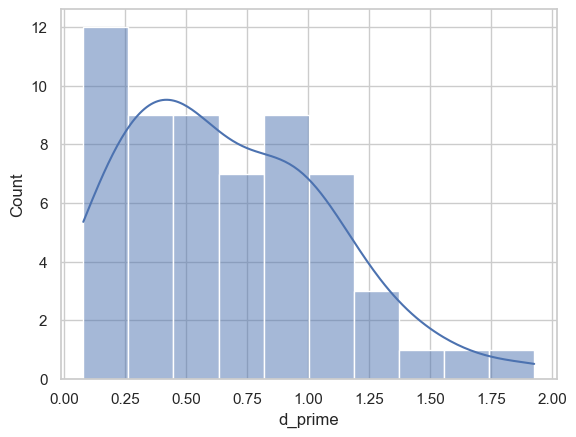

In [522]:
# d' distribution
dp_dist = resp_type_counts.copy()

# summary stats
mean_d = dp_dist['d_prime'].mean()
median_d = dp_dist['d_prime'].median()
sd_d = dp_dist['d_prime'].std()
n_total = len(dp_dist)
n_good = (dp_dist['d_prime']>=0.5).sum()
n_bad = (dp_dist['d_prime']<0.5).sum()

print(f"mean d′: {mean_d}")
print(f"med d′: {median_d}")
print(f"sd d′: {sd_d}")
print(f"total subjects: {n_total}")
print(f"num with d′ ≥ 0.5: {n_good}")
print(f"num with d′ < 0.5: {n_bad}")

# 2 SD cutoffs
lower_cutoff = mean_d-2*sd_d
upper_cutoff = mean_d+2*sd_d

print(f"Mean: {mean_d}, SD: {sd_d}")
print(f"2 SD cutoff range: {lower_cutoff} to {upper_cutoff}")

sns.histplot(dp_dist["d_prime"], bins=10, kde=True) 
# plt.figure(figsize=(10, 6))
# plt.hist(df['d_prime'])
# plt.show()

### Correct rejections and hit rate

In [523]:
# run t-tests on CR and hits

# calculate hit rate and CR rate
hit_rates = resp_type_counts['hit']/(resp_type_counts['hit']+resp_type_counts['miss'])
cr_rates = resp_type_counts['corr_rej']/(resp_type_counts['corr_rej']+resp_type_counts['false_alarm'])

# run t-test on hits and correct rejections
hit_t, hit_p = ttest_1samp(hit_rates, popmean=0.5)
cr_t, cr_p = ttest_1samp(cr_rates, popmean=0.5)

print("Hit rate: t =", hit_t, ", p =", hit_p)
print("Correct rejection rate: t =", cr_t, ", p =", cr_p)
print('')
print('for 70 participants, small but significant effect for hit rate and large signficant effect for correct rejection. it is easier to detect absence (aka correctly reject new stimuli) than it is to recognize (aka hit)')
print('')
print('')

print('FOR PILOT DATA')
print('-t-test on hit rates was not significant (t = 0.757, p= 0.461)')
print('-t-test on correct rejection rate was significant (t = 3.105, p = 0.007)')
print('-avg hit rate does not significantly differ from chance (0.5). participants, as a group, not reliably able to recognize old items better than chance')
print('-avg correct rejection rate is significantly different from chance (0.5). participants are better at correctly rejecting new items than what would be expected by chance, not quite significant though.')
print('-could suggest that participants adopted a somewhat conservative response strategy (tendency to say "new")')

Hit rate: t = 3.740293595513039 , p = 0.00042315005211120393
Correct rejection rate: t = 8.822361058066962 , p = 2.607311754009652e-12

for 70 participants, small but significant effect for hit rate and large signficant effect for correct rejection. it is easier to detect absence (aka correctly reject new stimuli) than it is to recognize (aka hit)


FOR PILOT DATA
-t-test on hit rates was not significant (t = 0.757, p= 0.461)
-t-test on correct rejection rate was significant (t = 3.105, p = 0.007)
-avg hit rate does not significantly differ from chance (0.5). participants, as a group, not reliably able to recognize old items better than chance
-avg correct rejection rate is significantly different from chance (0.5). participants are better at correctly rejecting new items than what would be expected by chance, not quite significant though.
-could suggest that participants adopted a somewhat conservative response strategy (tendency to say "new")


In [524]:
# in person only
# run t-tests on CR and hits

# calculate hit rate and CR rate
ip_hit_rates = ip_resp_type_counts['hit']/(ip_resp_type_counts['hit']+ip_resp_type_counts['miss'])
ip_cr_rates = ip_resp_type_counts['corr_rej']/(ip_resp_type_counts['corr_rej']+ip_resp_type_counts['false_alarm'])

# run t-test on hits and correct rejections
ip_hit_t, ip_hit_p = ttest_1samp(ip_hit_rates, popmean=0.5)
ip_cr_t, ip_cr_p = ttest_1samp(ip_cr_rates, popmean=0.5)

print("Hit rate: t =", ip_hit_t, 'positive but small', ", p =", ip_hit_p)
print("Correct rejection rate: t =", ip_cr_t, 'positive and moderate', ", p =", ip_cr_p)
print('')

Hit rate: t = 3.07326580148336 positive but small , p = 0.011775071193310227
Correct rejection rate: t = 3.764842798568767 positive and moderate , p = 0.003692672019323977



## Participant information summaries

### Total N

In [23]:
# total number of ALL participants (pre-exclusion)
all_total_n = len(all_pnt_info_df)
print(all_total_n)

# total number of participants (after excluding based on memory)
total_n = len(pnt_info_df)
print(total_n)

70
59


### Age stats

In [26]:
# age stats for ALL participants (pre-exclusion)
all_mean_age = all_pnt_info_df['age'].mean()
all_sd_age = all_pnt_info_df['age'].std()
all_min_age = all_pnt_info_df['age'].min()
all_max_age = all_pnt_info_df['age'].max()

print("All participants:")
print(f"Mean age: {all_mean_age:.2f}")
print(f"SD age: {all_sd_age:.2f}")
print(f"Min age: {all_min_age}")
print(f"Max age: {all_max_age}")

# age stats for participants (after excluding based on memory)
#pnt_info_df['age'] = pd.to_numeric(pnt_info_df['age'], errors='coerce')
mean_age = pnt_info_df['age'].mean()
sd_age = pnt_info_df['age'].std()
min_age = pnt_info_df['age'].min()
max_age = pnt_info_df['age'].max()

print("")
print("Only participants with good memory sensitivity:")
print(f"Mean age: {mean_age:.2f}")
print(f"SD age: {sd_age:.2f}")
print(f"Min age: {min_age}")
print(f"Max age: {max_age}")

All participants:
Mean age: 27.84
SD age: 5.28
Min age: 18.0
Max age: 35.0

Only participants with good memory sensitivity:
Mean age: 27.53
SD age: 5.44
Min age: 18.0
Max age: 35.0


### Ethnicity and race stats

In [29]:
# create function for showing the count and percent of demographic stats (for easy use later)

def count_and_perc(col):
    counts = pnt_info_df[col].value_counts(dropna=False)
    percents = counts/total_n*100
    summary_df = pd.DataFrame({'Count':counts, 'Percent':percents.round(2)})
    return summary_df

def all_count_and_perc(col):
    counts = all_pnt_info_df[col].value_counts(dropna=False)
    percents = counts/total_n*100
    summary_df = pd.DataFrame({'Count':counts, 'Percent':percents.round(2)})
    return summary_df

In [31]:
# ethnicity and race stats for ALL participants (pre-exclusion)
print("\nALL participants:")
print("Race counts and percentages:")
print(all_count_and_perc('race'))

# custom race entries
custom_race = pnt_info_df['race_custom'].dropna().unique()
print("\nCustom race entries:")
print(custom_race if len(custom_race) > 0 else "None")

# count number of ethnicity
print("\nEthnicity counts and percentages:")
print(all_count_and_perc('ethnicity'))


# ethnicity and race stats for participants (after excluding based on memory)
# count number of each race
print("\nOnly participants with good memory sensitivity:")
print("Race counts and percentages:")
print(count_and_perc('race'))

# custom race entries
custom_race = pnt_info_df['race_custom'].dropna().unique()
print("\nCustom race entries:")
print(custom_race if len(custom_race) > 0 else "None")

# count number of ethnicity
print("\nEthnicity counts and percentages:")
print(count_and_perc('ethnicity'))


ALL participants:
Race counts and percentages:
                                                    Count  Percent
race                                                              
["white"]                                              41    69.49
["black"]                                              17    28.81
["asian"]                                               7    11.86
["american_indian_alaskan","white"]                     1     1.69
["asian","white"]                                       1     1.69
["american_indian_alaskan"]                             1     1.69
["american_indian_alaskan","black","white","Oth...      1     1.69
["asian","white","Other"]                               1     1.69

Custom race entries:
['multiracial' 'Biracial']

Ethnicity counts and percentages:
              Count  Percent
ethnicity                   
hispanic_no      60   101.69
hispanic_yes     10    16.95

Only participants with good memory sensitivity:
Race counts and percentages:
    

### Gender stats

In [32]:
# gender stats for ALL participants (pre-exclusion)
print("ALL participants:")
print("\nGender counts and percentages:")
print(all_count_and_perc('gender'))

# custom gender entries
custom_gender = all_pnt_info_df['gender_custom'].dropna().unique()
print("\nCustom gender entries:")
print(custom_gender if len(custom_gender) > 0 else "None")


# gender stats for participants (after excluding based on memory)
print("\nOnly participants with good memory sensitivity:")
print("Gender counts and percentages:")
print(count_and_perc('gender'))

# custom gender entries
custom_gender = pnt_info_df['gender_custom'].dropna().unique()
print("\nCustom gender entries:")
print(custom_gender if len(custom_gender) > 0 else "None")

ALL participants:

Gender counts and percentages:
                  Count  Percent
gender                          
male                 37    62.71
female               31    52.54
gender_nonbinary      1     1.69
trans_female          1     1.69

Custom gender entries:
None

Only participants with good memory sensitivity:
Gender counts and percentages:
                  Count  Percent
gender                          
male                 31    52.54
female               26    44.07
gender_nonbinary      1     1.69
trans_female          1     1.69

Custom gender entries:
None


### Task order stats

In [761]:
# accuracy in each study part based on task order and curiosity type

# recall
recall_summary = all_recall_data.groupby(['task_order', 'curiosity_type']).agg({
    'recall_accuracy': ['mean', 'std'] 
}).round(3)

print("\nRecall Accuracy by Task Order and Curiosity Type:")
print(recall_summary)

# recognition
recognition_summary = all_recog_data.groupby(['task_order', 'curiosity_type']).agg({
    'accuracy': ['mean', 'std'] 
}).round(3)

print("\n\n\nRecognition Accuracy by Task Order and Curiosity Type:")
print(recognition_summary)

# choice
choice_summary = all_choice_data.groupby(['task_order', 'pair_type', 'chosenLabel']).size().unstack(fill_value=0)
choice_proportions = choice_summary.div(choice_summary.sum(axis=1), axis=0).round(3)

print("\n\n\nChoice Proportions by Task Order and Pair Type:")
print(choice_proportions)


Recall Accuracy by Task Order and Curiosity Type:
                                         recall_accuracy       
                                                    mean    std
task_order                curiosity_type                       
choice-recall-recognition high-curiosity           0.599  0.491
                          low-curiosity            0.442  0.498
choice-recognition-recall high-curiosity           0.562  0.498
                          low-curiosity            0.601  0.491
recall-recognition-choice high-curiosity           0.500  0.501
                          low-curiosity            0.382  0.487
recognition-recall-choice high-curiosity           0.566  0.496
                          low-curiosity            0.387  0.488



Recognition Accuracy by Task Order and Curiosity Type:
                                         accuracy       
                                             mean    std
task_order                curiosity_type                
choice-recall-re

/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_66259/2380160962.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recall_summary = all_recall_data.groupby(['task_order', 'curiosity_type']).agg({


In [530]:
print("\nTask order counts and percentages:")
print(count_and_perc('task_order'))


Task order counts and percentages:
                           Count  Percent
task_order                               
recognition-recall-choice     20    33.90
recall-recognition-choice     16    27.12
choice-recall-recognition     13    22.03
choice-recognition-recall     10    16.95


## Exploratory Analyses

### General task completion summary stats

In [531]:
task_order_dist = all_recog_data.groupby('task_order')['subject_id'].nunique()
print(task_order_dist)

print('')
print("\nDetailed breakdown:")
unique_task_orders = all_recog_data['task_order'].unique()
for task_order in unique_task_orders:
    task_df = all_recog_data[all_recog_data['task_order'] == task_order]
    subjects = task_df['subject_id'].unique()
    print(f"\nTask Order: {task_order} - {len(subjects)} unique subjects:")
    print(subjects)

task_order
choice-recall-recognition    13
choice-recognition-recall    10
recall-recognition-choice    16
recognition-recall-choice    20
Name: subject_id, dtype: int64


Detailed breakdown:

Task Order: choice-recall-recognition - 13 unique subjects:
['PNT001' 'PNT006' 'PNT015' 'PNT025' 'PNT030' 'PNT031' 'PNT033' 'PNT035'
 'PNT046' 'PNT085' 'PNT092' 'PNT096' 'PNT140']

Task Order: recognition-recall-choice - 20 unique subjects:
['PNT002' 'PNT003' 'PNT004' 'PNT005' 'PNT011' 'PNT012' 'PNT032' 'PNT039'
 'PNT041' 'PNT069' 'PNT072' 'PNT077' 'PNT080' 'PNT081' 'PNT083' 'PNT087'
 'PNT090' 'PNT093' 'PNT102' 'PNT137']

Task Order: recall-recognition-choice - 16 unique subjects:
['PNT008' 'PNT009' 'PNT010' 'PNT024' 'PNT026' 'PNT027' 'PNT029' 'PNT044'
 'PNT047' 'PNT062' 'PNT066' 'PNT079' 'PNT086' 'PNT116' 'PNT117' 'PNT133']

Task Order: choice-recognition-recall - 10 unique subjects:
['PNT013' 'PNT017' 'PNT023' 'PNT058' 'PNT064' 'PNT065' 'PNT070' 'PNT076'
 'PNT082' 'PNT134']


### Recall exploratory analyses

In [532]:
# distribution of recall accuracy by curiosity type
recall_by_curiosity = all_recall_data.groupby('curiosity_type')['recall_accuracy'].agg(['count', 'mean', 'std'])
recall_by_curiosity['percentage'] = (recall_by_curiosity['mean'] * 100).round(2).astype(str) + '%'
print("\nRecall Accuracy by Curiosity Type:")
print(recall_by_curiosity)


Recall Accuracy by Curiosity Type:
                count      mean       std percentage
curiosity_type                                      
high-curiosity    926  0.555076  0.497226     55.51%
low-curiosity     920  0.433696  0.495854     43.37%


In [533]:
# in person only
# distribution of recall accuracy by curiosity type
ip_recall_by_curiosity = ip_recall_data.groupby('curiosity_type')['recall_accuracy'].agg(['count', 'mean', 'std'])
recall_by_curiosity['percentage'] = (ip_recall_by_curiosity['mean'] * 100).round(2).astype(str) + '%'
print("\nRecall Accuracy by Curiosity Type:")
print(ip_recall_by_curiosity)


Recall Accuracy by Curiosity Type:
                count      mean       std
curiosity_type                           
high-curiosity    170  0.594118  0.492513
low-curiosity     166  0.409639  0.493255


In [534]:
# individual participant performance
print("\nIndividual Participant Performance:")
subject_performance = all_recall_data.groupby(['subject_id', 'curiosity_type'])['recall_accuracy'].agg(['count', 'mean'])
print(subject_performance)


Individual Participant Performance:
                           count    mean
subject_id curiosity_type               
PNT001     high-curiosity     16  0.5625
           low-curiosity      16  0.4375
PNT002     high-curiosity     16  0.4375
           low-curiosity      16  0.1875
PNT003     high-curiosity     16  0.5000
...                          ...     ...
PNT134     low-curiosity      16  0.6250
PNT137     high-curiosity     16  0.9375
           low-curiosity      16  0.6250
PNT140     high-curiosity     16  0.6250
           low-curiosity      15  0.6000

[118 rows x 2 columns]


### Recognition exploratory analyses

In [535]:
# distribution of recognition accuracy by curiosity type
recog_by_curiosity = all_recog_data.groupby('curiosity_type')['accuracy'].agg(['count', 'mean', 'std'])
recog_by_curiosity['percentage'] = (recog_by_curiosity['mean'] * 100).round(2).astype(str) + '%'
print("\nRecognition Accuracy by Curiosity Type:")
print(recog_by_curiosity)


Recognition Accuracy by Curiosity Type:
                count      mean       std percentage
curiosity_type                                      
high-curiosity    944  0.569915  0.495350     56.99%
low-curiosity     944  0.575212  0.494573     57.52%
no-curiosity     1888  0.666843  0.471467     66.68%


In [536]:
# in person only
# distribution of recognition accuracy by curiosity type
ip_recog_by_curiosity = ip_recog_data.groupby('curiosity_type')['accuracy'].agg(['count', 'mean', 'std'])
ip_recog_by_curiosity['percentage'] = (ip_recog_by_curiosity['mean'] * 100).round(2).astype(str) + '%'
print("\nRecognition Accuracy by Curiosity Type:")
print(ip_recog_by_curiosity)


Recognition Accuracy by Curiosity Type:
                count      mean       std percentage
curiosity_type                                      
high-curiosity    176  0.647727  0.479041     64.77%
low-curiosity     176  0.607955  0.489600      60.8%
no-curiosity      352  0.676136  0.468615     67.61%


In [537]:
# individual participant performance
print("\nIndividual Participant Performance:")
subject_performance = all_recog_data.groupby(['subject_id', 'curiosity_type'])['accuracy'].agg(['count', 'mean'])
print(subject_performance)


Individual Participant Performance:
                           count     mean
subject_id curiosity_type                
PNT001     high-curiosity     16  0.50000
           low-curiosity      16  0.31250
           no-curiosity       32  0.78125
PNT002     high-curiosity     16  0.75000
           low-curiosity      16  0.87500
...                          ...      ...
PNT137     low-curiosity      16  0.81250
           no-curiosity       32  0.56250
PNT140     high-curiosity     16  0.43750
           low-curiosity      16  0.50000
           no-curiosity       32  0.62500

[177 rows x 2 columns]


In [538]:
# display count/proportion of response types
resp_type_counts = all_recog_data.groupby(['subject_id', 'response_type']).size().unstack(fill_value=0)
resp_type_props = resp_type_counts.div(resp_type_counts.sum(axis=1), axis=0)

print(resp_type_counts)
print("")
print("")
print(resp_type_props)

response_type  corr_rej  false_alarm  hit  miss
subject_id                                     
PNT001               25            7   13    19
PNT002               16           16   26     6
PNT003               28            4   20    12
PNT004               15           17   23     9
PNT005               18           14   25     7
PNT006               23            9   20    12
PNT008               18           14   15    17
PNT009               28            4   17    15
PNT010               19           13   21    11
PNT011               28            4   25     7
PNT012               20           12   16    16
PNT013               24            8   10    22
PNT015               22           10   15    17
PNT017               26            6   14    18
PNT023               27            5   12    20
PNT024               22           10   21    11
PNT025               24            8   16    16
PNT026               17           15   21    11
PNT027               25            7   1

In [539]:
# in person only 
# display count/proportion of response types
ip_resp_type_counts = ip_recog_data.groupby(['subject_id', 'response_type']).size().unstack(fill_value=0)
ip_resp_type_props = ip_resp_type_counts.div(ip_resp_type_counts.sum(axis=1), axis=0)

print(ip_resp_type_counts)
print("")
print("")
print(ip_resp_type_props)

response_type  corr_rej  false_alarm  hit  miss
subject_id                                     
PNT001               25            7   13    19
PNT002               16           16   26     6
PNT003               28            4   20    12
PNT004               15           17   23     9
PNT005               18           14   25     7
PNT006               23            9   20    12
PNT008               18           14   15    17
PNT009               28            4   17    15
PNT010               19           13   21    11
PNT011               28            4   25     7
PNT012               20           12   16    16


response_type  corr_rej  false_alarm       hit      miss
subject_id                                              
PNT001         0.390625     0.109375  0.203125  0.296875
PNT002         0.250000     0.250000  0.406250  0.093750
PNT003         0.437500     0.062500  0.312500  0.187500
PNT004         0.234375     0.265625  0.359375  0.140625
PNT005         0.281250     0.21

#### ResMem exploratory

In [609]:
# run analysis on mean resmem score and mean accuracy for each image (checking resmem performance for these images, essentially)
# create new df containing resmem score and mean accuracy for each image
resmem_data = all_recog_data.groupby('image', observed=True)[['resmem_score', 'accuracy']].mean().reset_index()
resmem_data = resmem_data.rename(columns={'accuracy': 'mean_accuracy'})
print(resmem_data)

# run linear model between resmem_score and mean accuracy
resmen_acc_lm = smf.ols('mean_accuracy ~ resmem_score', data=resmem_data).fit()
print('ResMem and accuracy linear model summary')
print("Estimate:", resmen_acc_lm.params['resmem_score'])
print("p-value", resmen_acc_lm.pvalues['resmem_score'])
print('')
print(resmen_acc_lm.summary())

# run correlation between resmem score and mean accuracy (should be same as lm)
resmem_acc_corr = stats.pearsonr(resmem_data['resmem_score'], resmem_data['mean_accuracy'])
print('')
print('')
print('ResMem and accuracy correlation stats:')
print(resmem_acc_corr)
# significant positive association between resmem score and memory recognition performance

            image  resmem_score  mean_accuracy
0    novel001.jpg      0.862740       0.500000
1    novel003.jpg      0.766079       0.764706
2    novel004.jpg      0.860178       0.555556
3    novel005.jpg      0.864635       0.526316
4    novel010.jpg      0.790485       0.550000
..            ...           ...            ...
195  novel388.jpg      0.759864       0.523810
196  novel393.jpg      0.879672       0.916667
197  novel394.jpg      0.852345       0.400000
198  novel395.jpg      0.838226       0.814815
199  novel396.jpg      0.797682       0.615385

[200 rows x 3 columns]
ResMem and accuracy linear model summary
Estimate: 0.47935732307731027
p-value 0.0002877179231262128

                            OLS Regression Results                            
Dep. Variable:          mean_accuracy   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     

In [546]:
# average resmem score of the photos
avg_resmem = sum(resmem_scores.values())/len(resmem_scores)
print('avg =', avg_resmem)



avg = 0.8432546579837799


In [781]:
resmem_scores

{'novel139.jpg': 0.7769385576248169,
 'novel105.jpg': 0.8601779937744141,
 'novel059.jpg': 0.8691588044166565,
 'novel071.jpg': 0.7982451915740967,
 'novel273.jpg': 0.8303030133247375,
 'novel266.jpg': 0.8429923057556152,
 'novel272.jpg': 0.8315956592559814,
 'novel064.jpg': 0.86505126953125,
 'novel058.jpg': 0.9020079374313354,
 'novel104.jpg': 0.9075421094894409,
 'novel138.jpg': 0.9127665758132935,
 'novel312.jpg': 0.8940669298171997,
 'novel338.jpg': 0.8848974108695984,
 'novel310.jpg': 0.9095891714096069,
 'novel106.jpg': 0.7997919917106628,
 'novel264.jpg': 0.9335823655128479,
 'novel270.jpg': 0.7381776571273804,
 'novel271.jpg': 0.8590970039367676,
 'novel265.jpg': 0.9036158919334412,
 'novel073.jpg': 0.8286694884300232,
 'novel067.jpg': 0.7952539324760437,
 'novel098.jpg': 0.8365017175674438,
 'novel107.jpg': 0.844542384147644,
 'novel305.jpg': 0.8979122638702393,
 'novel339.jpg': 0.9149355888366699,
 'novel103.jpg': 0.7532597780227661,
 'novel088.jpg': 0.8746781945228577,
 'no

In [547]:
# no new images, include resmem scores

# copy all_recog_data
all_recog_data_resmem = all_recog_data.copy()

# remove no-curiosity rows 
recog_no_new_resmem = all_recog_data_resmem.drop(all_recog_data_resmem[all_recog_data_resmem['curiosity_type']=='no-curiosity'].index)

# ensure curiosity_type is categorial
recog_no_new_resmem['curiosity_type'] = pd.Categorical(recog_no_new_resmem['curiosity_type'])

### run the model
# with random intercepts and slopes (ideal model)
resmem_recog_model = Lmer("accuracy ~ resmem_score + (1|subject_id)", data=recog_no_new_resmem, family="binomial")
# binomial family for binary outcome variable 

results = resmem_recog_model.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(resmem_recog_model.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(resmem_recog_model.ranef)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: accuracy~resmem_score+(1|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1888	 Groups: {'subject_id': 59.0}

Log-likelihood: -1261.320 	 AIC: 2528.639

Random effects:

                   Name    Var    Std
subject_id  (Intercept)  0.282  0.531

No random effect correlations specified

Fixed effects:

Fixed Effects:
              Estimate    2.5_ci   97.5_ci        SE        OR  OR_2.5_ci  \
(Intercept)  -0.987230 -2.336955  0.362494  0.688648  0.372607   0.096621   
resmem_score  1.546544 -0.045278  3.138366  0.812169  4.695216   0.955732   

              OR_97.5_ci      Prob  Prob_2.5_ci  Prob_97.5_ci    Z-stat  \
(Intercept)     1.436909  0.271459     0.088108      0.589644 -1.433579   
resmem_score   23.066156  0.824414     0.488682      0.958448  1.904214   

                 P-val Sig  
(Intercept)   0.151693      
resmem_score  0.056882   .  

Random Effects:
        (Intercept)
PNT

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Choice exploratory analyses

In [548]:
# count num of trials for each pair type (sanity check)
pair_type_counts = all_choice_data['pair_type'].value_counts().reset_index()
pair_type_counts.columns = ['Pair Type', 'Num Trials']
print("Number of trials for each pair type:")
print(pair_type_counts)
print()
# total (8 of each trial types per participant, 59 participants)

Number of trials for each pair type:
  Pair Type  Num Trials
0  high-low         472
1   low-new         472
2  high-new         472



In [549]:
# group by pair type and chosen label
choices_by_pair = all_choice_data.groupby(['pair_type', 'chosenLabel']).size().reset_index()
choices_by_pair.columns = ['pairtype', 'chosenLabel', 'count']

# get total num of trials for each pair type (across all participants, so equals 8*number of participants)
totals = all_choice_data.groupby('pair_type').size().reset_index()
totals.columns = ['pairtype', 'total']

# merge to get proportions
choices_with_totals = pd.merge(choices_by_pair, totals, on='pairtype')
choices_with_totals['proportion'] = choices_with_totals['count']/choices_with_totals['total']
choices_with_totals['percentage'] = choices_with_totals['proportion']*100

choices_with_totals

,pairtype,chosenLabel,count,total,proportion,percentage
0,high-low,high-curiosity,236,472,0.500000,50.000000
1,high-low,low-curiosity,236,472,0.500000,50.000000
2,high-new,high-curiosity,231,472,0.489407,48.940678
3,high-new,new,241,472,0.510593,51.059322
4,low-new,low-curiosity,247,472,0.523305,52.330508
5,low-new,new,225,472,0.476695,47.669492


  type  mean_choose_r
0   hl       0.570796
1   hn       0.560976
2   lh       0.569106
3   ln       0.577093
4   nh       0.535398
5   nl       0.600000


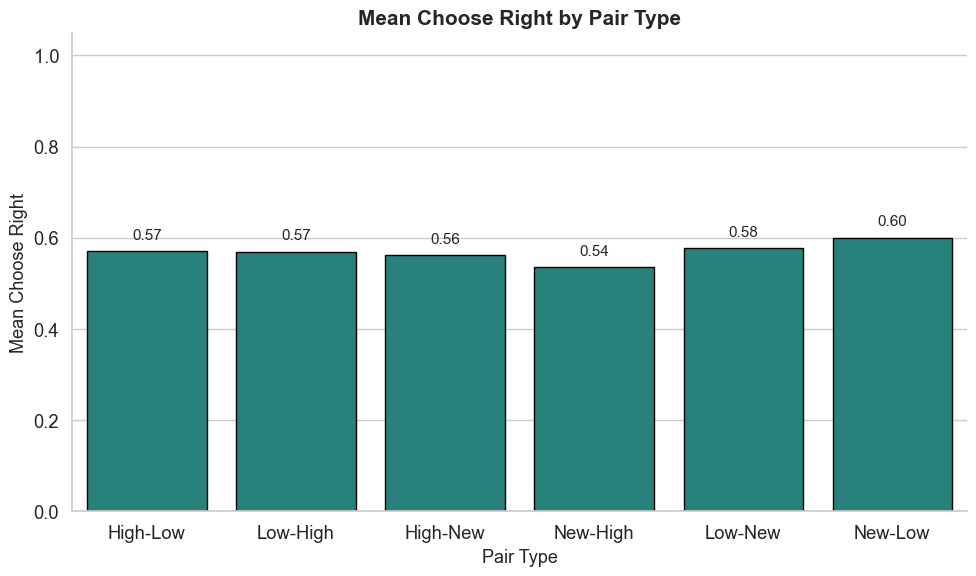

In [680]:
choices_pos_df = all_choice_data.copy()
choices_pos_df=choices_pos_df[['pair_type', 'left_label', 'right_label', 'chosenLabel', 'chosen_side', 'choose_r']]
choices_pos_df



# create a function to define a new 'type' column based on the combination of pair_type and the image type on the right
def assign_type(row):
    if row['pair_type'] == 'high-low' and row['right_label'] == 'low-curiosity':
        return 'hl'
    elif row['pair_type'] == 'high-low' and row['right_label'] == 'high-curiosity':
        return 'lh'
    elif row['pair_type'] == 'high-new' and row['right_label'] == 'new':
        return 'hn'
    elif row['pair_type'] == 'high-new' and row['right_label'] == 'high-curiosity':
        return 'nh'
    elif row['pair_type'] == 'low-new' and row['right_label'] == 'new':
        return 'ln'
    elif row['pair_type'] == 'low-new' and row['right_label'] == 'low-curiosity':
        return 'nl'
    else:
        return 'other'

# create column in new df
choices_pos_df['type'] = choices_pos_df.apply(assign_type, axis=1)
choices_pos_df

# group by type and find mean choose_r
mean_choose_r_df = choices_pos_df.groupby('type', observed=True)['choose_r'].mean().reset_index()
mean_choose_r_df.rename(columns={'choose_r': 'mean_choose_r'}, inplace=True)
print(mean_choose_r_df)

# Map short labels to full names
label_map = {
    'hl': 'High-Low',
    'lh': 'Low-High',
    'hn': 'High-New',
    'nh': 'New-High',
    'ln': 'Low-New',
    'nl': 'New-Low'
}
mean_choose_r_df['display_label'] = mean_choose_r_df['type'].map(label_map)

# Sort bars in a meaningful order (optional)
order = ['High-Low', 'Low-High', 'High-New', 'New-High', 'Low-New', 'New-Low']

# Set style
sns.set(style="whitegrid", font_scale=1.2)

# Create figure
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=mean_choose_r_df,
    x='display_label',
    y='mean_choose_r',
    order=order,
    color='#199188',
    edgecolor='black'
)

# Add value labels on top of bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height + 0.02),
                     ha='center', va='bottom',
                     fontsize=11)

# Customize axes and layout
plt.ylim(0, 1.05)
plt.xlabel('Pair Type', fontsize=13)
plt.ylabel('Mean Choose Right', fontsize=13)
plt.title('Mean Choose Right by Pair Type', fontsize=15, weight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
sns.despine()

plt.show()

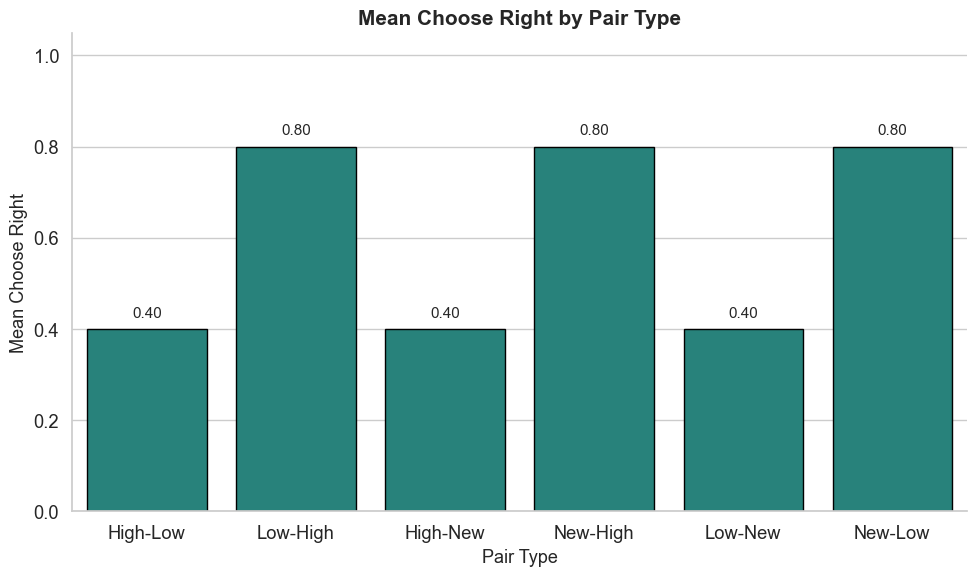

In [762]:
# mock data (for presentation only)
# Map short labels to full names
label_map = {
    'hl': 'High-Low',
    'lh': 'Low-High',
    'hn': 'High-New',
    'nh': 'New-High',
    'ln': 'Low-New',
    'nl': 'New-Low'
}
mean_choose_r_df['display_label'] = mean_choose_r_df['type'].map(label_map)

# Manually assign different means
mean_values = {
    'hl': 0.4,
    'lh': 0.8,
    'hn': 0.4,
    'nh': 0.8,
    'ln': 0.4,
    'nl': 0.8
}
mean_choose_r_df['mean_choose_r'] = mean_choose_r_df['type'].map(mean_values)

# Sort bars in a meaningful order
order = ['High-Low', 'Low-High', 'High-New', 'New-High', 'Low-New', 'New-Low']

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=mean_choose_r_df,
    x='display_label',
    y='mean_choose_r',
    order=order,
    color='#199188',
    edgecolor='black'
)

# Add value labels on top of bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height + 0.02),
                     ha='center', va='bottom',
                     fontsize=11)

plt.ylim(0, 1.05)
plt.xlabel('Pair Type', fontsize=13)
plt.ylabel('Mean Choose Right', fontsize=13)
plt.title('Mean Choose Right by Pair Type', fontsize=15, weight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
sns.despine()

plt.show()


In [550]:
# in person only
# group by pair type and chosen label
ip_choices_by_pair = ip_choice_data.groupby(['pair_type', 'chosenLabel']).size().reset_index()
ip_choices_by_pair.columns = ['pairtype', 'chosenLabel', 'count']

# get total num of trials for each pair type (across all participants, so equals 8*number of participants)
ip_totals = ip_choice_data.groupby('pair_type').size().reset_index()
ip_totals.columns = ['pairtype', 'total']

# merge to get proportions
ip_choices_with_totals = pd.merge(ip_choices_by_pair, ip_totals, on='pairtype')
ip_choices_with_totals['proportion'] = ip_choices_with_totals['count']/ip_choices_with_totals['total']
ip_choices_with_totals['percentage'] = ip_choices_with_totals['proportion']*100

ip_choices_with_totals

,pairtype,chosenLabel,count,total,proportion,percentage
0,high-low,high-curiosity,43,88,0.488636,48.863636
1,high-low,low-curiosity,45,88,0.511364,51.136364
2,high-new,high-curiosity,41,88,0.465909,46.590909
3,high-new,new,47,88,0.534091,53.409091
4,low-new,low-curiosity,39,88,0.443182,44.318182
5,low-new,new,49,88,0.556818,55.681818


In [551]:
# analyze choices by pair type

# group by pair type and chosen label
choices_by_pair = all_choice_data.groupby(['pair_type', 'chosenLabel']).size().reset_index()
choices_by_pair.columns = ['pairtype', 'chosenLabel', 'count']

# get total num of trials for each pair type (across all participants, so equals 8*number of participants)
totals = all_choice_data.groupby('pair_type').size().reset_index()
totals.columns = ['pairtype', 'total']

# merge to get proportions
choices_with_totals = pd.merge(choices_by_pair, totals, on='pairtype')
choices_with_totals['proportion'] = choices_with_totals['count'] / choices_with_totals['total']
choices_with_totals['percentage'] = choices_with_totals['proportion'] * 100

choices_with_totals = choices_with_totals.sort_values(['pairtype', 'chosenLabel'])
choices_with_totals

,pairtype,chosenLabel,count,total,proportion,percentage
0,high-low,high-curiosity,236,472,0.500000,50.000000
1,high-low,low-curiosity,236,472,0.500000,50.000000
2,high-new,high-curiosity,231,472,0.489407,48.940678
3,high-new,new,241,472,0.510593,51.059322
4,low-new,low-curiosity,247,472,0.523305,52.330508
5,low-new,new,225,472,0.476695,47.669492


In [694]:
all_choice_data.columns

Index(['subject_id', 'trial_index', 'task_order', 'task_type', 'rt', 'time',
       'timestamp', 'trial_num', 'pair_type', 'left_image', 'right_image',
       'left_label', 'right_label', 'response', 'chosenImage', 'chosenLabel',
       'chosen_side', 'choose_r', 'l_value', 'r_value', 'r_min_l', 'l_fam',
       'r_fam', 'fam_r_min_l', 'l_app', 'r_app', 'app_r_min_l', 'l_int',
       'r_int', 'int_r_min_l'],
      dtype='object')

  pair_type          rt
0  high-low  849.927966
1  high-new  900.898305
2   low-new  906.661017


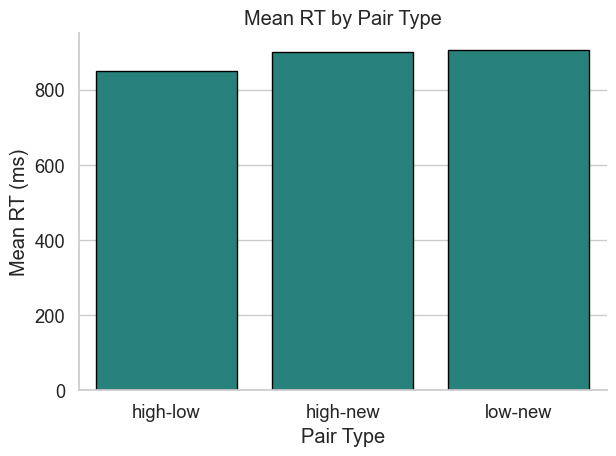

In [701]:
# effect of curiosity on deliberation time (rt) during the choice
# average rt for each pair type
avg_pair_type_rt = all_choice_data.groupby('pair_type')['rt'].mean().reset_index()
print(avg_pair_type_rt)

sns.barplot(data=avg_pair_type_rt, x='pair_type', y='rt', color='#199188', edgecolor='black')
plt.xlabel('Pair Type')
plt.ylabel('Mean RT (ms)')
plt.title('Mean RT by Pair Type')
plt.xticks(rotation=0)
plt.tight_layout()
sns.despine()
plt.show()

      chosenLabel          rt
0  high-curiosity  854.438972
1   low-curiosity  886.016563
2             new  917.092275


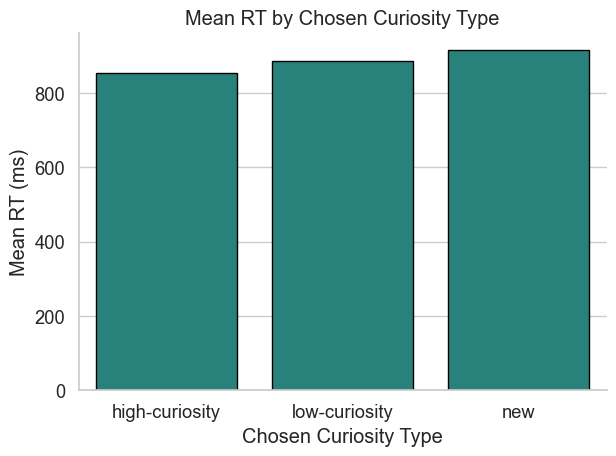

In [703]:
avg_rt_by_choice = all_choice_data.groupby('chosenLabel')['rt'].mean().reset_index()
print(avg_rt_by_choice)

sns.barplot(data=avg_rt_by_choice, x='chosenLabel', y='rt', color='#199188', edgecolor='black')
plt.xlabel('Chosen Curiosity Type')
plt.ylabel('Mean RT (ms)')
plt.title('Mean RT by Chosen Curiosity Type')
plt.xticks(rotation=0)
plt.tight_layout()
sns.despine()
plt.show()

  pair_type     chosenLabel          rt
0  high-low  high-curiosity  863.673729
1  high-low   low-curiosity  836.182203
2  high-new  high-curiosity  845.004329
3  high-new             new  954.473029
4   low-new   low-curiosity  933.631579
5   low-new             new  877.053333


/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_66259/450617398.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


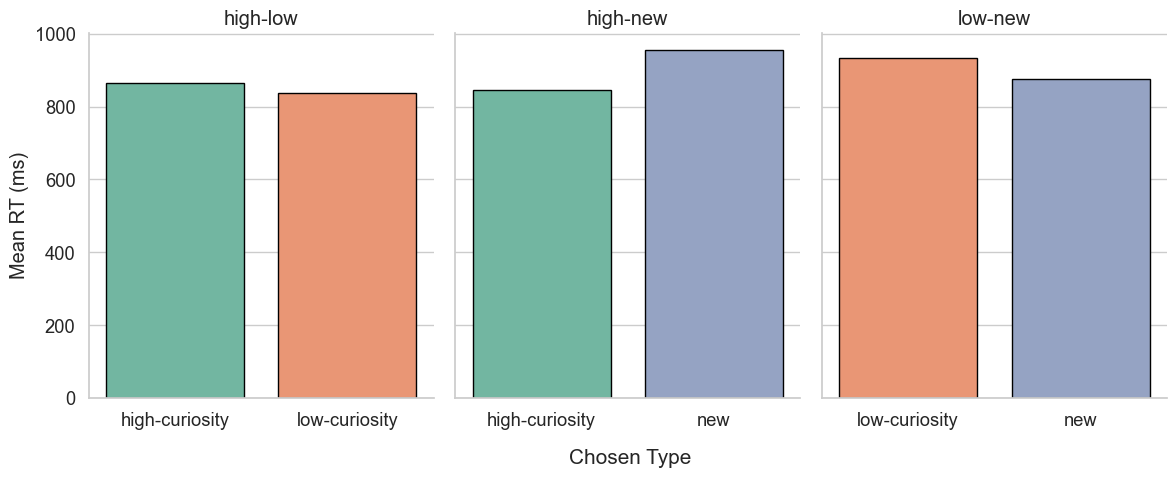

In [741]:
avg_rt_by_pair_and_choice = (
    all_choice_data.groupby(['pair_type', 'chosenLabel'])['rt']
      .mean()
      .reset_index()
)

print(avg_rt_by_pair_and_choice)


# filter out nulls
plot_data = avg_rt_by_pair_and_choice.dropna(subset=["rt"])

# facet plot
g = sns.catplot(
    data=plot_data,
    x="chosenLabel",
    y="rt",
    col="pair_type",
    kind="bar",
    palette="Set2",
    edgecolor="black",
    height=5,
    aspect=0.8,
    sharex=False  
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Mean RT (ms)")  # Remove individual x-axis labels

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)  # add room for the centered label below axis ticks

# Add a single centered x-axis label across all subplots
g.fig.text(0.535, 0.04, 'Chosen Type', ha='center', va='bottom', fontsize=15)
plt.show()


In [718]:
print(avg_rt_by_pair_and_choice.pivot(index="pair_type", columns="chosenLabel", values="rt"))


chosenLabel  high-curiosity  low-curiosity         new
pair_type                                             
high-low         863.673729     836.182203         NaN
high-new         845.004329            NaN  954.473029
low-new                 NaN     933.631579  877.053333


In [708]:
model = smf.mixedlm("rt ~ chosen_type + pair_type", all_choice_data, groups=df["subject_id"])
result = model.fit()
print(result.summary())

                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        rt         
No. Observations:        1416           Method:                    REML       
No. Groups:              59             Scale:                     982345.8950
Min. group size:         24             Log-Likelihood:            -11795.0499
Max. group size:         24             Converged:                 Yes        
Mean group size:         24.0                                                 
------------------------------------------------------------------------------
                               Coef.    Std.Err.   z    P>|z|  [0.025   0.975]
------------------------------------------------------------------------------
Intercept                       834.656   77.513 10.768 0.000  682.733 986.579
chosenLabel[T.low-curiosity]     30.544   75.965  0.402 0.688 -118.346 179.433
chosenLabel[T.new]               74.938   76.081  0.985 0.325  -74.179 22

## Main Analyses

### Curiosity and Memory
#### Main Model: 
*Mixed-effects logistic regression* with outcome variable of **image recognition/trivia recall accuracy**, predictor variables **curiosity** [high, low, no (in recall)] and **reaction time during initial encoding**, random intercepts for subject, and random slopes for curiosity type. 

#### Variables:
- **trivia_recall:** accurate recall of trivia question answers learned in Part 1
- **image_recognition:** accurate OLD/NEW answer for images seen in low-, high-, and no-curiosity conditions
- **curiosity_type:** high-curiosity, low-curiosity, or no-curiosity. no-curiosity is only included in the image recognition analyses, since there are no new trivia questions (i.e., no prior curiosity)
- **encoding_rt** (for recognition model only): reaction time for responding 'pointy' or 'rounded' at initial image encoding. Longer reaction times to pointy or rounded may suggest that participants looked longer at the images, thus had deeper encoding. Longer reaction times may predict better accuracy on the image recognition test
- **jud_accuracy** (REMOVED) (for recognition model only): binary variable describing whether the participant's judgement of pointy or rounded during initial encoding of the incidental images in Part 1 was "correct" (based on human and computer ratings). We assume that if participants are more accurate during encoding, it should predict better memory or interact with memory as an indicator of attentional state during encoding

#### Random effects:
- Random intercepts for subject: accounts for baseline variation in performance across participants
- Random slopes for curiosity: different people may be more or less sensitive to curiosity in terms of how it affects their memory performance instead of assuming curiosity has one fixed effect for everyone

### Results:
- Significant effect of high curiosity on accurate trivia recall
- No significant effects of curiosity on accurate image recognition

### Curiosity and Recall

In [33]:
# ensure curiosity_type is categorial
all_recall_data['curiosity_type'] = pd.Categorical(all_recall_data['curiosity_type'])

# with random intercepts and slopes (ideal model)
cur_recall_model = Lmer("recall_accuracy ~ curiosity_type + (1 + curiosity_type|subject_id)", data=all_recall_data, family="binomial")
# binomial family for binary outcome variable 

# simpler model with only random intercepts (due to limited data error)
#cur_recall_model = Lmer("recall_accuracy ~ curiosity_type + (1|subject_id)", data=all_recall_data, family="binomial")

results = cur_recall_model.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(cur_recall_model.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(cur_recall_model.ranef)

# different optimizers
#results = cur_recall_model.fit(control="optimizer='bobyqa', optCtrl=list(maxfun=2e5)")

# pilot results
# Fixed Effects:
#                              Estimate    2.5_ci   97.5_ci        SE        OR  \
# (Intercept)                  0.008292 -0.267988  0.284573  0.140962  1.008327   
# curiosity_typelow-curiosity -0.831563 -1.318870 -0.344256  0.248631  0.435368   

#                              OR_2.5_ci  OR_97.5_ci      Prob  Prob_2.5_ci  \
# (Intercept)                   0.764917    1.329194  0.502073     0.433401   
# curiosity_typelow-curiosity   0.267437    0.708747  0.303315     0.211006   

#                              Prob_97.5_ci    Z-stat     P-val  Sig  
# (Intercept)                      0.570667  0.058826  0.953091       
# curiosity_typelow-curiosity      0.414776 -3.344573  0.000824  ***  

print('')
print('TL:DR')
print('Significant negative effect')
print('Low-curiosity items were recalled less accurately than high-curiosity items')
print('Odds of correct recall decreased by ~46%.')

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: recall_accuracy~curiosity_type+(1+curiosity_type|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1888	 Groups: {'subject_id': 59.0}

Log-likelihood: -1204.284 	 AIC: 2418.568

Random effects:

                                   Name    Var    Std
subject_id                  (Intercept)  0.499  0.706
subject_id  curiosity_typelow-curiosity  0.145  0.381

                    IV1                          IV2   Corr
subject_id  (Intercept)  curiosity_typelow-curiosity  0.072

Fixed effects:

Fixed Effects:
                             Estimate    2.5_ci   97.5_ci        SE        OR  \
(Intercept)                  

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [553]:
# in person only
# ensure curiosity_type is categorial
ip_recall_data['curiosity_type'] = pd.Categorical(ip_recall_data['curiosity_type'])

# with random intercepts and slopes (ideal model)
ip_cur_recall_model = Lmer("recall_accuracy ~ curiosity_type + (1 + curiosity_type|subject_id)", data=ip_recall_data, family="binomial")
# binomial family for binary outcome variable 

# simpler model with only random intercepts (due to limited data error)
#cur_recall_model = Lmer("recall_accuracy ~ curiosity_type + (1|subject_id)", data=all_recall_data, family="binomial")

results = ip_cur_recall_model.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(ip_cur_recall_model.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(ip_cur_recall_model.ranef)

# different optimizers
#results = cur_recall_model.fit(control="optimizer='bobyqa', optCtrl=list(maxfun=2e5)")

boundary (singular) fit: see help('isSingular') 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: recall_accuracy~curiosity_type+(1+curiosity_type|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 352	 Groups: {'subject_id': 11.0}

Log-likelihood: -222.788 	 AIC: 455.577

Random effects:

                                   Name    Var    Std
subject_id                  (Intercept)  0.212  0.460
subject_id  curiosity_typelow-curiosity  0.010  0.098

                    IV1                          IV2  Corr
subject_id  (Intercept)  curiosity_typelow-curiosity   1.0

Fixed effects:

Fixed Effects:
                             Estimate    2.5_ci   97.5_ci        

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


### Curiosity and Recognition

In [554]:
# correlation between mean rt and mean recognition accuracy
recog_means = all_recog_data.groupby('subject_id').agg({'encoding_rt':'mean', 'accuracy':'mean'}).reset_index()
recog_means.columns = ['subject_id', 'mean_rt', 'mean_accuracy']

pearson_r, pearson_p = pearsonr(recog_means['mean_rt'], recog_means['mean_accuracy'])
pearson_r

pearson_r, pearson_p = pearsonr(recog_means['mean_rt'], recog_means['mean_accuracy'])
    
print(f"Number of subjects: {len(recog_means)}")
print("\nMeans by subject:")
print(recog_means)
    
print("\nPearson correlation:")
print(f"r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print('encoding reaction time is now NOT significantly correlated to accuracy.')
print('')
print('PILOT RESULTS')
print('Pearson correlation: r = 0.587, p = 0.017; encoding reaction time significantly correlated to higher accuracy. this means that subjects spent longer before choosing pointy rounded judgements were more accurate in image recognition. this is expected')

Number of subjects: 59

Means by subject:
   subject_id      mean_rt  mean_accuracy
0      PNT001  1219.125000       0.593750
1      PNT002  2015.833333       0.656250
2      PNT003  1254.687500       0.750000
3      PNT004  1252.548387       0.593750
4      PNT005  1637.354839       0.671875
5      PNT006  2026.531250       0.671875
6      PNT008  1951.035714       0.515625
7      PNT009  1817.612903       0.703125
8      PNT010   916.437500       0.625000
9      PNT011  1734.187500       0.828125
10     PNT012  1451.000000       0.562500
11     PNT013  1362.064516       0.531250
12     PNT015  1548.500000       0.578125
13     PNT017  1860.906250       0.625000
14     PNT023  1539.437500       0.609375
15     PNT024  1435.000000       0.671875
16     PNT025  1923.066667       0.625000
17     PNT026  1640.250000       0.593750
18     PNT027  1396.031250       0.656250
19     PNT029  1810.031250       0.593750
20     PNT030  1475.937500       0.546875
21     PNT031  2134.413793       0

In [555]:
# in person only
# correlation between mean rt and mean recognition accuracy
ip_recog_means = ip_recog_data.groupby('subject_id').agg({'encoding_rt':'mean', 'accuracy':'mean'}).reset_index()
ip_recog_means.columns = ['subject_id', 'mean_rt', 'mean_accuracy']

pearson_r, pearson_p = pearsonr(ip_recog_means['mean_rt'], ip_recog_means['mean_accuracy'])
pearson_r

pearson_r, pearson_p = pearsonr(ip_recog_means['mean_rt'], ip_recog_means['mean_accuracy'])
    
print(f"Number of subjects: {len(ip_recog_means)}")
print("\nMeans by subject:")
print(ip_recog_means)
    
print("\nPearson correlation:")
print(f"r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print('no significant relationship between encoding time and OLD/NEW recognition accuracy')


Number of subjects: 11

Means by subject:
   subject_id      mean_rt  mean_accuracy
0      PNT001  1219.125000       0.593750
1      PNT002  2015.833333       0.656250
2      PNT003  1254.687500       0.750000
3      PNT004  1252.548387       0.593750
4      PNT005  1637.354839       0.671875
5      PNT006  2026.531250       0.671875
6      PNT008  1951.035714       0.515625
7      PNT009  1817.612903       0.703125
8      PNT010   916.437500       0.625000
9      PNT011  1734.187500       0.828125
10     PNT012  1451.000000       0.562500

Pearson correlation:
r = 0.115, p = 0.736
no significant relationship between encoding time and OLD/NEW recognition accuracy


In [556]:
# no new images, encoding rt included

# copy all_recog_data
all_recog_data_cop = all_recog_data

# remove no-curiosity rows 
recog_no_new = all_recog_data_cop.drop(all_recog_data_cop[all_recog_data_cop['curiosity_type']=='no-curiosity'].index)

### UPDATE ROWS WITH NULL ENCODING RTs
# replace NaNs in the encoding_rt column with 4000 (aka 4 seconds, the max time before no response was recorded in part 1)
#recog_no_new['encoding_rt'] = recog_no_new['encoding_rt'].fillna(4000)
# OR (ideal, cleaner method is to remove the null rows; but if we have to remove more than 15-20% of the rows due to this, just replace with max of 4000)
# remove no responses on initial encoding (aka max encoding_rt)... this would not have equal number of observations for subjects though
recog_no_new = recog_no_new.dropna(subset=['encoding_rt'])

# divide encoding_rt by 1000 to make it into seconds; make variables closer in scale
recog_no_new['encoding_rt_sec'] = recog_no_new['encoding_rt']/1000

# remove poor memory sensitivity
# recog_no_new2 = recog_no_new.drop(recog_no_new2[recog_no_new2['subject_id'].isin(['PIL045', 'PIL048'])].index)

# ensure curiosity_type is categorial
recog_no_new['curiosity_type'] = pd.Categorical(recog_no_new['curiosity_type'])

### run the model
# with random intercepts and slopes (ideal model)
cur_recog_model = Lmer("accuracy ~ curiosity_type*encoding_rt_sec + (1 + curiosity_type|subject_id)", data=recog_no_new, family="binomial")
# binomial family for binary outcome variable 

results = cur_recog_model.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(cur_recog_model.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(cur_recog_model.ranef)

# directly access and print model coefficients
#print("Fixed Effects:")
#print(cur_recog_model.coefs)

# directly access and print random effects
#print("\nRandom Effects:")
#print(cur_recog_model.ranef)

# PILOT RESULTS
# Fixed Effects:
#                                              Estimate    2.5_ci   97.5_ci  \
# (Intercept)                                  0.295121 -0.355324  0.945566   
# curiosity_typelow-curiosity                 -1.061880 -2.056721 -0.067040   
# encoding_rt_sec                             -0.040451 -0.364492  0.283590   
# curiosity_typelow-curiosity:encoding_rt_sec  0.477564 -0.027653  0.982780   

#                                                    SE        OR  OR_2.5_ci  \
# (Intercept)                                  0.331866  1.343289   0.700946   
# curiosity_typelow-curiosity                  0.507581  0.345805   0.127873   
# encoding_rt_sec                              0.165330  0.960356   0.694550   
# curiosity_typelow-curiosity:encoding_rt_sec  0.257768  1.612142   0.972726   

#                                              OR_97.5_ci      Prob  \
# (Intercept)                                    2.574269  0.573249   
# curiosity_typelow-curiosity                    0.935158  0.256950   
# encoding_rt_sec                                1.327888  0.489889   
# curiosity_typelow-curiosity:encoding_rt_sec    2.671875  0.617172   

#                                              Prob_2.5_ci  Prob_97.5_ci  \
# (Intercept)                                     0.412092      0.720223   
# curiosity_typelow-curiosity                     0.113375      0.483246   
# encoding_rt_sec                                 0.409873      0.570426   
# curiosity_typelow-curiosity:encoding_rt_sec     0.493087      0.727660   

#                                                Z-stat     P-val Sig  
# (Intercept)                                  0.889278  0.373854      
# curiosity_typelow-curiosity                 -2.092040  0.036435   *  
# encoding_rt_sec                             -0.244667  0.806714      
# curiosity_typelow-curiosity:encoding_rt_sec  1.852685  0.063928   .  

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: accuracy~curiosity_type*encoding_rt_sec+(1+curiosity_type|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1838	 Groups: {'subject_id': 59.0}

Log-likelihood: -1228.314 	 AIC: 2470.627

Random effects:

                                   Name    Var    Std
subject_id                  (Intercept)  0.278  0.527
subject_id  curiosity_typelow-curiosity  0.002  0.043

                    IV1                          IV2  Corr
subject_id  (Intercept)  curiosity_typelow-curiosity  -1.0

Fixed effects:

Fixed Effects:
                                             Estimate    2.5_ci   97.5_ci  \
(Intercept)                                  0.607803  0.202437  1.013169   
curiosity_typelow-curiosity                 -0.030176 -0.545617  0.485265   
encoding_rt_sec                             -0.170785 -0.381080  0.039510   
curiosity_typelow-curiosity:en

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [557]:
# no new images, include resmem scores

# copy all_recog_data
all_recog_data_cop = all_recog_data

# remove no-curiosity rows 
recog_no_new = all_recog_data_cop.drop(all_recog_data_cop[all_recog_data_cop['curiosity_type']=='no-curiosity'].index)

# ensure curiosity_type is categorial
recog_no_new['curiosity_type'] = pd.Categorical(recog_no_new['curiosity_type'])

### run the model
# with random intercepts and slopes (ideal model)
cur_recog_model = Lmer("accuracy ~ curiosity_type*resmem_score + (1 + curiosity_type|subject_id)", data=recog_no_new, family="binomial")
# binomial family for binary outcome variable 

results = cur_recog_model.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(cur_recog_model.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(cur_recog_model.ranef)


boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: accuracy~curiosity_type*resmem_score+(1+curiosity_type|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1888	 Groups: {'subject_id': 59.0}

Log-likelihood: -1260.667 	 AIC: 2535.335

Random effects:

                                   Name    Var    Std
subject_id                  (Intercept)  0.306  0.553
subject_id  curiosity_typelow-curiosity  0.002  0.046

                    IV1                          IV2  Corr
subject_id  (Intercept)  curiosity_typelow-curiosity  -1.0

Fixed effects:

Fixed Effects:
                                          Estimate    2.5_ci   97.5_ci  \
(Intercept)                              -1.759265 -3.727493  0.208963   
curiosity_typelow-curiosity               1.454496 -1.251480  4.160472   
resmem_score                              2.445926  0.124147  4.767706   
curiosity_typelow-curiosity:resmem_score -1.6

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [653]:
simp_cur_recog_model = Lmer("accuracy ~ curiosity_type + (curiosity_type|subject_id)", data=recog_no_new, family="binomial")
results = simp_cur_recog_model.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(simp_cur_recog_model.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(simp_cur_recog_model.ranef)

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: accuracy~curiosity_type+(curiosity_type|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1888	 Groups: {'subject_id': 59.0}

Log-likelihood: -1263.037 	 AIC: 2536.075

Random effects:

                                   Name    Var    Std
subject_id                  (Intercept)  0.308  0.555
subject_id  curiosity_typelow-curiosity  0.002  0.045

                    IV1                          IV2  Corr
subject_id  (Intercept)  curiosity_typelow-curiosity  -1.0

Fixed effects:

Fixed Effects:
                             Estimate    2.5_ci   97.5_ci        SE        OR  \
(Intercept)                  0.305338  0.110311  0.500365  0.099506  1.357084   
curiosity_typelow-curiosity  0.019189 -0.170273  0.208650  0.096666  1.019374   

                             OR_2.5_ci  OR_97.5_ci      Prob  Prob_2.5_ci  \
(Intercept)                   1.116

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [558]:
# in person only 
# no new images, encoding rt included

# copy all_recog_data
ip_recog_data_cop = ip_recog_data

# remove no-curiosity rows 
ip_recog_no_new = ip_recog_data_cop.drop(ip_recog_data_cop[ip_recog_data_cop['curiosity_type']=='no-curiosity'].index)

### UPDATE ROWS WITH NULL ENCODING RTs
# replace NaNs in the encoding_rt column with 4000 (aka 4 seconds, the max time before no response was recorded in part 1)
#recog_no_new['encoding_rt'] = recog_no_new['encoding_rt'].fillna(4000)
# OR (ideal, cleaner method is to remove the null rows; but if we have to remove more than 15-20% of the rows due to this, just replace with max of 4000)
# remove no responses on initial encoding (aka max encoding_rt)... this would not have equal number of observations for subjects though
ip_recog_no_new = ip_recog_no_new.dropna(subset=['encoding_rt'])

# divide encoding_rt by 1000 to make it into seconds; make variables closer in scale
ip_recog_no_new['encoding_rt_sec'] = ip_recog_no_new['encoding_rt']/1000

# remove poor memory sensitivity
# recog_no_new2 = recog_no_new.drop(recog_no_new2[recog_no_new2['subject_id'].isin(['PIL045', 'PIL048'])].index)

# ensure curiosity_type is categorial
ip_recog_no_new['curiosity_type'] = pd.Categorical(ip_recog_no_new['curiosity_type'])

### run the model
# with random intercepts and slopes (ideal model)
ip_cur_recog_model = Lmer("accuracy ~ curiosity_type*encoding_rt_sec + (1 + curiosity_type|subject_id)", data=ip_recog_no_new, family="binomial")
# binomial family for binary outcome variable 

results = ip_cur_recog_model.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(ip_cur_recog_model.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(ip_cur_recog_model.ranef)

# directly access and print model coefficients
#print("Fixed Effects:")
#print(cur_recog_model.coefs)

# directly access and print random effects
#print("\nRandom Effects:")
#print(cur_recog_model.ranef)

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: accuracy~curiosity_type*encoding_rt_sec+(1+curiosity_type|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 343	 Groups: {'subject_id': 11.0}

Log-likelihood: -222.724 	 AIC: 459.447

Random effects:

                                   Name    Var    Std
subject_id                  (Intercept)  0.119  0.345
subject_id  curiosity_typelow-curiosity  0.007  0.083

                    IV1                          IV2  Corr
subject_id  (Intercept)  curiosity_typelow-curiosity   1.0

Fixed effects:

Fixed Effects:
                                             Estimate    2.5_ci   97.5_ci  \
(Intercept)                                  0.518895 -0.279215  1.317005   
curiosity_typelow-curiosity                  0.047150 -1.026035  1.120335   
encoding_rt_sec                              0.084220 -0.359941  0.528381   
curiosity_typelow-curiosity:encod

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [559]:
recog_dummy_cur = recog_no_new
recog_dummy_cur['cur_coded'] = np.where(recog_dummy_cur['curiosity_type'] == 'high-curiosity', 1, 0)
recog_dummy_cur

,subject_id,trial_index,task_order,task_type,trial_num,image,resmem_score,image_type,response,key_pressed,curiosity_type,rt,subject_jud,encoding_rt,subject_response,accuracy,response_type,correct_jud,jud_accuracy,cur_coded
1639,PNT001,407,choice-recall-recognition,recognition,40,novel230.jpg,0.840132,old,k,k,low-curiosity,845.0,rounded,2102.0,new,0,miss,pointy,0.0,0
1640,PNT001,412,choice-recall-recognition,recognition,41,novel273.jpg,0.830303,old,k,k,low-curiosity,793.0,rounded,1430.0,new,0,miss,rounded,1.0,0
1642,PNT001,422,choice-recall-recognition,recognition,43,novel303.jpg,0.905488,old,j,j,high-curiosity,2065.0,rounded,1566.0,old,1,hit,rounded,1.0,1
1643,PNT001,427,choice-recall-recognition,recognition,44,novel361.jpg,0.883909,old,k,k,high-curiosity,730.0,rounded,964.0,new,0,miss,rounded,1.0,1
1645,PNT001,437,choice-recall-recognition,recognition,46,novel109.jpg,0.846429,old,j,j,low-curiosity,1180.0,rounded,830.0,old,1,hit,pointy,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,PNT140,412,choice-recall-recognition,recognition,41,novel221.jpg,0.852808,old,J,J,low-curiosity,1008.0,pointy,1607.0,old,1,hit,pointy,1.0,0
2538,PNT140,422,choice-recall-recognition,recognition,43,novel189.jpg,0.881237,old,J,J,high-curiosity,1153.0,rounded,728.0,old,1,hit,rounded,1.0,1
2537,PNT140,417,choice-recall-recognition,recognition,42,novel139.jpg,0.776939,old,K,K,high-curiosity,35689.0,rounded,898.0,new,0,miss,rounded,1.0,1
2542,PNT140,442,choice-recall-recognition,recognition,47,novel323.jpg,0.826856,old,J,J,low-curiosity,399.0,rounded,961.0,old,1,hit,rounded,1.0,0


In [560]:
# flip reference so that low curiosity is the reference
# dummy code low as 0 and high as 1

# copy cleaned recog df from above
recog_dummy_cur = recog_no_new

# add column with curiosity dummy coded
recog_dummy_cur['cur_coded'] = np.where(recog_dummy_cur['curiosity_type'] == 'high-curiosity', 1, 0)


### run the model
# with random intercepts and slopes (ideal model)
cur_recog_model_dc = Lmer("accuracy ~ cur_coded*encoding_rt_sec + (1 + cur_coded|subject_id)", data=recog_dummy_cur, family="binomial")
# binomial family for binary outcome variable 

results = cur_recog_model_dc.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(cur_recog_model_dc.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(cur_recog_model_dc.ranef)

# directly access and print model coefficients
#print("Fixed Effects:")
#print(cur_recog_model.coefs)

# directly access and print random effects
#print("\nRandom Effects:")
#print(cur_recog_model.ranef)

RRuntimeError: Error in eval(predvars, data, env) : object 'encoding_rt_sec' not found


### Curiosity and Choice Preference
#### Main Model: 
*Mixed-effects logistic regression* with outcome variable of **P choose right**, predictor variables **(R-L)**, the **difference in appeal** between right and left image, the **difference in familiarity** between right and left image, the **difference in interest** between right and left image, and the interaction between **R-L and the difference in appeal** between right and left image. Random intercepts for subject and random slopes for R-L.

#### Variables:
- **choose_r:** binary variable describing whether the participant chose the image presented on the right side of the screen. It's a binary outcome (1 = "right," 0 = "left") and we are modeling it using logistic regression.
- **r_min_l:** the difference in "value" between the image on the right side of the screen and the image on the left side of the screen. High-curiosity = 3, low-curiosity = 2, and no-curiosity = 0.
- **app_r_min_l:** the difference in the appeal of the image on the right and the image on the left, as stated in the ratings file from the original dataset (Cooper et al., 2023)
- **fam_r_min_l:** the difference in the familiarity of the image on the right and the image on the left, as stated in the ratings file from the original dataset (Cooper et al., 2023)
- **int_r_min_l:** the difference in the interest of the image on the right and the image on the left, as stated in the ratings file from the original dataset (Cooper et al., 2023)
- **(r-l)*(app_r_min_l):** include the interaction between R-L and difference in appeal to account for how curiosity and appeal interact to produce choice patterns. The effect of R-L on choosing the right option might depend on how appealing the options were or vice versa

#### Random effects:
- Random intercepts for subject: accounts for baseline variation in performance across participants. For example, one subject may just tend to choose the option on the left more option regardless of any other factors
- Random slopes for R-L: different people may be more or less sensitive to the "value" of high-curiosity, low-curioisty, and no-curiosity stimuli in terms of how it affects their choices instead of assuming that predetermined values of 3,2, and 0 have one fixed effect for everyonethe right
	


In [561]:
# curiosity choice preference mixed effects logistic regression
cur_choice_pref_mod = Lmer("choose_r ~ r_min_l + app_r_min_l + fam_r_min_l + int_r_min_l + (r_min_l*app_r_min_l) + (1 + r_min_l|subject_id)", data=all_choice_data, family='binomial')
results = cur_choice_pref_mod.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(cur_choice_pref_mod.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(cur_choice_pref_mod.ranef)

#PILOT RESULTS
# Fixed Effects:
#                      Estimate    2.5_ci   97.5_ci        SE        OR  \
# (Intercept)          0.143854 -0.072026  0.359734  0.110145  1.154716   
# r_min_l              0.016298 -0.103631  0.136227  0.061190  1.016431   
# app_r_min_l          0.960865  0.271755  1.649975  0.351593  2.613956   
# fam_r_min_l         -0.113775 -0.417419  0.189869  0.154923  0.892459   
# int_r_min_l         -0.097956 -0.744469  0.548557  0.329860  0.906688   
# r_min_l:app_r_min_l -0.109693 -0.424992  0.205607  0.160870  0.896109   

#                      OR_2.5_ci  OR_97.5_ci      Prob  Prob_2.5_ci  \
# (Intercept)           0.930507    1.432948  0.535902     0.482001   
# r_min_l               0.901557    1.145942  0.504074     0.474115   
# app_r_min_l           1.312265    5.206849  0.723295     0.567524   
# fam_r_min_l           0.658745    1.209091  0.471587     0.397135   
# int_r_min_l           0.474986    1.730753  0.475530     0.322028   
# r_min_l:app_r_min_l   0.653775    1.228271  0.472604     0.395323   

#                      Prob_97.5_ci    Z-stat     P-val Sig  
# (Intercept)              0.588976  1.306045  0.191537      
# r_min_l                  0.534004  0.266349  0.789970      
# app_r_min_l              0.838888  2.732887  0.006278  **  
# fam_r_min_l              0.547325 -0.734395  0.462708      
# int_r_min_l              0.633801 -0.296964  0.766494      
# r_min_l:app_r_min_l      0.551221 -0.681871  0.495321  

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_r~r_min_l+app_r_min_l+fam_r_min_l+int_r_min_l+(r_min_l*app_r_min_l)+(1+r_min_l|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1416	 Groups: {'subject_id': 59.0}

Log-likelihood: -883.203 	 AIC: 1784.405

Random effects:

                   Name    Var    Std
subject_id  (Intercept)  1.078  1.038
subject_id      r_min_l  0.015  0.124

                    IV1      IV2   Corr
subject_id  (Intercept)  r_min_l -0.425

Fixed effects:

Fixed Effects:
                     Estimate    2.5_ci   97.5_ci        SE        OR  \
(Intercept)          0.421357  0.125748  0.716967  0.150824  1.524029   
r_min_l             -0.011278 -0.078768  0.056213  0.034435  0.988786   
app_r_min_l          1.412006  1.006441  1.817570  0.206924  4.104179   
fam_r_min_l          0.096108 -0.077491  0.269706  0.088572  1.100878   
int_r_min_l         -0.655632 -1.057628 -0.253637  0.205103  0.519114   
r_min_l:a

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [742]:
# curiosity choice preference mixed effects logistic regression, including rt for the choice
cur_choice_pref_mod = Lmer("choose_r ~ r_min_l + rt + rt*r_min_l + app_r_min_l + fam_r_min_l + int_r_min_l + (r_min_l*app_r_min_l) + (1 + r_min_l|subject_id)", data=all_choice_data, family='binomial')
results = cur_choice_pref_mod.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(cur_choice_pref_mod.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(cur_choice_pref_mod.ranef)

[1] "Model failed to converge with max|grad| = 0.456743 (tol = 0.002, component 1)"
[2] " \n"                                                                          

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

[1] "Model is nearly unidentifiable: large eigenvalue ratio\n - Rescale variables?"
[2] " \n"                                                                          

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_r~r_min_l+rt+rt*r_min_l+app_r_min_l+fam_r_min_l+int_r_min_l+(r_min_l*app_r_min_l)+(1+r_min_l|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1416	 Groups: {'subject_id': 59.0}

Log-likelihood: -883.189 	 AIC: 1788.378

Random effects:

                   Name    Var    Std
subject_id  (Intercept)  1.078  1.038
subject_id      r_min_l  0.015  0.124

                    IV1      IV2   Corr


/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [562]:
# in person only 
# curiosity choice preference mixed effects logistic regression
ip_cur_choice_pref_mod = Lmer("choose_r ~ r_min_l + app_r_min_l + fam_r_min_l + int_r_min_l + (r_min_l*app_r_min_l) + (1 + r_min_l|subject_id)", data=ip_choice_data, family='binomial')
results = ip_cur_choice_pref_mod.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(ip_cur_choice_pref_mod.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(ip_cur_choice_pref_mod.ranef)


Model failed to converge with max|grad| = 0.16433 (tol = 0.002, component 1) 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_r~r_min_l+app_r_min_l+fam_r_min_l+int_r_min_l+(r_min_l*app_r_min_l)+(1+r_min_l|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 264	 Groups: {'subject_id': 11.0}

Log-likelihood: -176.940 	 AIC: 371.879

Random effects:

                   Name    Var    Std
subject_id  (Intercept)  0.007  0.081
subject_id      r_min_l  0.006  0.075

                    IV1      IV2   Corr
subject_id  (Intercept)  r_min_l -0.975

Fixed effects:

Fixed Effects:
                     Estimate    2.5_ci   97.5_ci        SE        OR  \
(Intercept)          0.061447 -0.196490  0.319383  0.131603  1.063374   
r_min_l             -0.080150 -0.204750  0.044450  0.063573  0.922978   
app_r_min_l          1.327757  0.422284  2.233229  0.461984  3.772571   
fam_r_min_l         -0.064102 -0.434668  0.306464  0.189068  0.937909   
int_r

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [645]:
# just looking at high-low choice pairs
high_low_choice_data = all_choice_data.copy()
high_low_choice_data = high_low_choice_data[high_low_choice_data['pair_type'] == 'high-low']
high_low_choice_data

# curiosity choice preference mixed effects logistic regression (JUST HIGH-LOW PAIRS)
high_low_cur_choice_pref_mod = Lmer("choose_r ~ r_min_l + app_r_min_l + fam_r_min_l + int_r_min_l + (r_min_l*app_r_min_l) + (1 + r_min_l|subject_id)", data=high_low_choice_data, family='binomial')
results = high_low_cur_choice_pref_mod.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(high_low_cur_choice_pref_mod.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(high_low_cur_choice_pref_mod.ranef)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_r~r_min_l+app_r_min_l+fam_r_min_l+int_r_min_l+(r_min_l*app_r_min_l)+(1+r_min_l|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 472	 Groups: {'subject_id': 59.0}

Log-likelihood: -299.049 	 AIC: 616.098

Random effects:

                   Name    Var    Std
subject_id  (Intercept)  0.664  0.815
subject_id      r_min_l  0.113  0.336

                    IV1      IV2  Corr
subject_id  (Intercept)  r_min_l  0.55

Fixed effects:

Fixed Effects:
                     Estimate    2.5_ci   97.5_ci        SE        OR  \
(Intercept)          0.318821  0.024689  0.612952  0.150070  1.375504   
r_min_l              0.006773 -0.220065  0.233610  0.115736  1.006796   
app_r_min_l          1.723426  0.960341  2.486511  0.389336  5.603693   
fam_r_min_l         -0.063869 -0.377253  0.249514  0.159892  0.938128   
int_r_min_l         -1.011797 -1.722222 -0.301371  0.362469  0.363565   
r_min_l:app_r

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


In [682]:
# simple model (just curiosity and choice preference)
# curiosity choice preference mixed effects logistic regression
simp_cur_choice_pref_mod = Lmer("choose_r ~ r_min_l + (r_min_l|subject_id)", data=all_choice_data, family='binomial')
results = simp_cur_choice_pref_mod.fit()

# directly access and print model coefficients
print("Fixed Effects:")
print(simp_cur_choice_pref_mod.coefs)

# directly access and print random effects
print("\nRandom Effects:")
print(simp_cur_choice_pref_mod.ranef)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: choose_r~r_min_l+(r_min_l|subject_id)

Family: binomial	 Inference: parametric

Number of observations: 1416	 Groups: {'subject_id': 59.0}

Log-likelihood: -917.385 	 AIC: 1844.770

Random effects:

                   Name    Var    Std
subject_id  (Intercept)  0.937  0.968
subject_id      r_min_l  0.014  0.116

                    IV1      IV2   Corr
subject_id  (Intercept)  r_min_l -0.367

Fixed effects:

Fixed Effects:
             Estimate    2.5_ci   97.5_ci        SE        OR  OR_2.5_ci  \
(Intercept)  0.393286  0.115804  0.670769  0.141575  1.481843   1.122775   
r_min_l     -0.016140 -0.080924  0.048643  0.033053  0.983989   0.922264   

             OR_97.5_ci      Prob  Prob_2.5_ci  Prob_97.5_ci    Z-stat  \
(Intercept)    1.955741  0.597074     0.528919      0.661675  2.777929   
r_min_l        1.049846  0.495965     0.479780      0.512158 -0.488310   

                P-val Sig  
(Intercept)  0.005471  **  

/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


## Data Visualizations

### Curiosity and Memory Recall
Violin + swarm plot

#### Psychonomics 2025 (Hedden & Bakkour) poster

/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_46386/104553846.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='curiosity_label', y='recall_accuracy', data=recall_summary, order=order, inner=None, palette=violin_colors)
/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_46386/104553846.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = recall_summary.groupby('curiosity_label')['recall_accuracy'].mean()
/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_46386/104553846.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass 

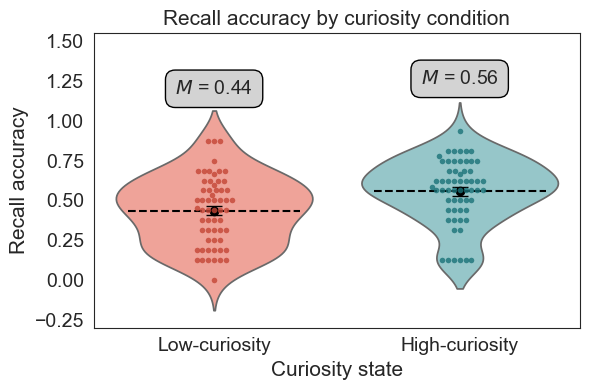

In [133]:
# used for Psychonomics 2025 poster
# overall effect of curiosity type on recall accuracy
plt.figure(figsize=(6, 4))
sns.set_style("white")

# find mean accuracy per participant
recall_summary = all_recall_data.groupby(['subject_id', 'curiosity_type'], sort=False, observed=True, as_index=False)['recall_accuracy'].agg('mean')
recall_summary

# fix capitalization and set order
labels = {'low-curiosity': 'Low-curiosity', 'high-curiosity': 'High-curiosity'}
recall_summary['curiosity_label'] = recall_summary['curiosity_type'].map(labels)
order = ['Low-curiosity', 'High-curiosity']

# define custom colors for high and low curiosity conditions
#colors = {'high-curiosity': '#1a7278', 'low-curiosity': '#c44535'}
#violin_colors = {'high-curiosity': '#1b8a92', 'low-curiosity': '#e8432f'}
violin_colors = {'High-curiosity': '#8ecdd1', 'Low-curiosity': '#fd988b'}
dot_colors = {'High-curiosity': '#1a7278', 'Low-curiosity': '#c44535'}

# create violin + swarm plot
sns.violinplot(x='curiosity_label', y='recall_accuracy', data=recall_summary, order=order, inner=None, palette=violin_colors)

# overlay individual subject avg accuracies
for cond in ['High-curiosity', 'Low-curiosity']:
    subset = recall_summary[recall_summary['curiosity_label'] == cond]
    sns.swarmplot(
        x='curiosity_label',
        y='recall_accuracy',
        data=subset,
        order=order,
        color=dot_colors[cond],
        size=4,
        alpha=0.8
    )

# add in overall mean by condition and error bars
group_means = recall_summary.groupby('curiosity_label')['recall_accuracy'].mean()
group_se = recall_summary.groupby('curiosity_label')['recall_accuracy'].sem()

# find the max value per condition (to position the mean label)
for i, cond in enumerate(order):
    subset = recall_summary[recall_summary['curiosity_label'] == cond]
    max_y = subset['recall_accuracy'].max()
    se = group_se[cond]
    mean = group_means[cond]
    
    # dashed line and error bars on violin for group means
    plt.hlines(y=mean, xmin=i - 0.35, xmax=i + 0.35, color='black', linestyles='dashed', linewidth=1.5)
    plt.errorbar(x=i, y=mean, yerr=se, fmt='o', color='black', capsize=6, markersize=6, elinewidth=1.5)
    
    # mean label above the violin
    plt.text(
        i, max_y + 0.27,  # position just above the violin
        f'$M$ = {mean:.2f}',
        ha='center', va='bottom', fontsize=14,
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5')
    )


# plot style preferences
plt.xlabel('Curiosity state', fontsize=15)
plt.ylabel('Recall accuracy', fontsize=15)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.ylim(-0.3, 1.55)
plt.title('Recall accuracy by curiosity condition', fontsize=15)
plt.tight_layout()
plt.show()


### Curiosity and Memory Recognition

#### Psychonomics 2025 (Hedden & Bakkour) poster

In [124]:
for i, cond in enumerate(order):
    subset = recog_summary[recog_summary['curiosity_type'] == cond]
    max_y = subset['accuracy'].max()
    se = group_se[cond]
    mean = group_means[cond]
    print(max_y)
    print(se)
    print(mean)

nan
0.021463162151524655
0.5752118644067796
nan
0.02231349794655918
0.5699152542372882


/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_46386/3437196667.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='curiosity_label', y='accuracy', data=recog_summary, order=order, inner=None, palette=violin_colors)


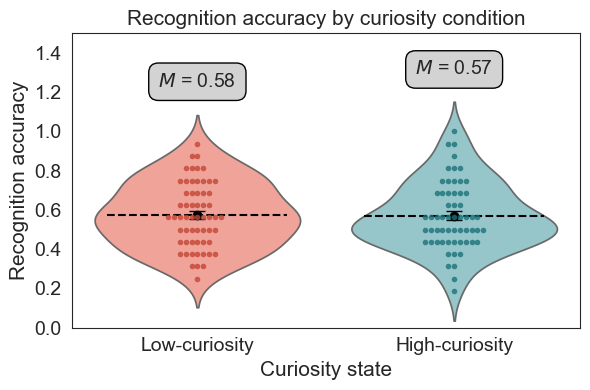

In [135]:
# used for Psychonomics 2025 poster
# overall effect of curiosity type on recall accuracy
plt.figure(figsize=(6, 4))
sns.set_style("white")

# find mean accuracy per participant
recog_summary = all_recog_data[all_recog_data['curiosity_type'].isin(['high-curiosity', 'low-curiosity'])].groupby(['subject_id', 'curiosity_type'], sort=False, observed=True, as_index=False)['accuracy'].agg('mean')
recog_summary

# fix capitalization and set order
labels = {'low-curiosity': 'Low-curiosity', 'high-curiosity': 'High-curiosity'}
recog_summary['curiosity_label'] = recog_summary['curiosity_type'].map(labels)
order = ['Low-curiosity', 'High-curiosity']

# define custom colors for high and low curiosity conditions
#colors = {'high-curiosity': '#1a7278', 'low-curiosity': '#c44535'}
#violin_colors = {'high-curiosity': '#1b8a92', 'low-curiosity': '#e8432f'}
violin_colors = {'High-curiosity': '#8ecdd1', 'Low-curiosity': '#fd988b'}
dot_colors = {'High-curiosity': '#1a7278', 'Low-curiosity': '#c44535'}

# create violin + swarm plot
sns.violinplot(x='curiosity_label', y='accuracy', data=recog_summary, order=order, inner=None, palette=violin_colors)

# overlay individual subject avg accuracies
for cond in ['High-curiosity', 'Low-curiosity']:
    subset = recog_summary[recog_summary['curiosity_label'] == cond]
    sns.swarmplot(
        x='curiosity_label',
        y='accuracy',
        data=subset,
        order=order,
        color=dot_colors[cond],
        size=4,
        alpha=0.8
    )

# add in overall mean by condition and error bars
group_means = recog_summary.groupby('curiosity_label')['accuracy'].mean()
group_se = recog_summary.groupby('curiosity_label')['accuracy'].sem()

# find the max value per condition (to position the mean label)
for i, cond in enumerate(order):
    subset = recog_summary[recog_summary['curiosity_label'] == cond]
    max_y = subset['accuracy'].max()
    se = group_se[cond]
    mean = group_means[cond]
    
    # dashed line and error bars on violin for group means
    plt.hlines(y=mean, xmin=i - 0.35, xmax=i + 0.35, color='black', linestyles='dashed', linewidth=1.5)
    plt.errorbar(x=i, y=mean, yerr=se, fmt='o', color='black', capsize=6, markersize=6, elinewidth=1.5)
    
    # mean label above the violin
    plt.text(
        i, max_y + 0.27,  # position just above the violin
        f'$M$ = {mean:.2f}',
        ha='center', va='bottom', fontsize=14,
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5')
    )


# plot style preferences
plt.xlabel('Curiosity state', fontsize=15)
plt.ylabel('Recognition accuracy', fontsize=15)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.ylim(0, 1.5)
plt.title('Recognition accuracy by curiosity condition', fontsize=15)
plt.tight_layout()
plt.show()


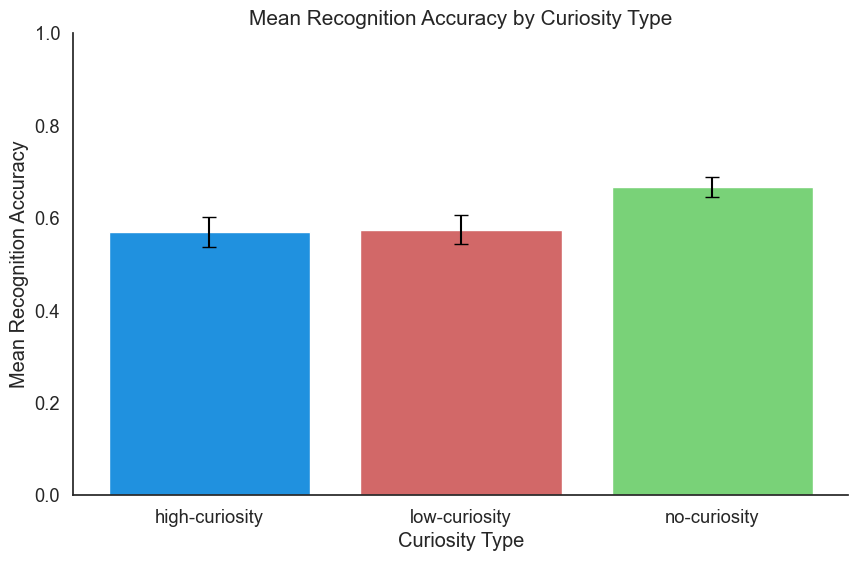

In [780]:
# overall effect of curiosity type on recall accuracy
plt.figure(figsize=(10, 6))
sns.set_style("white")

summary_data = all_recog_data.groupby('curiosity_type', observed=True)['accuracy'].agg(['mean', 'count'])
summary_data['se'] = np.sqrt(summary_data['mean'] * (1 - summary_data['mean']) / summary_data['count'])
summary_data['ci_lower'] = summary_data['mean'] - 1.96 * summary_data['se']
summary_data['ci_upper'] = summary_data['mean'] + 1.96 * summary_data['se']

ax = sns.barplot(x='curiosity_type', y='accuracy', hue='curiosity_type', data=all_recog_data, 
                 order=['high-curiosity', 'low-curiosity', 'no-curiosity'],
                 hue_order=['high-curiosity', 'low-curiosity', 'no-curiosity'],
                 palette=['#0097ff', '#e45656', '#6be169'], errorbar=None, legend=False)

# error bars
for i, condition in enumerate(['high-curiosity', 'low-curiosity', 'no-curiosity']):
    mean = summary_data.loc[condition, 'mean']
    ci_lower = summary_data.loc[condition, 'ci_lower']
    ci_upper = summary_data.loc[condition, 'ci_upper']
    plt.errorbar(i, mean, yerr=[[mean-ci_lower], [ci_upper-mean]], 
                 fmt='none', color='black', capsize=5)

# Customize axes and appearance
plt.ylim(0, 1)
plt.ylabel("Mean Recognition Accuracy")
plt.xlabel("Curiosity Type")
plt.title("Mean Recognition Accuracy by Curiosity Type", fontsize=15)


# Remove top and right spines
sns.despine(top=True, right=True)

### Curiosity and Choice Preference

In [613]:
all_choice_data[['choose_r', 'r_min_l']]

,choose_r,r_min_l
602,0,-1
603,1,1
600,0,2
623,1,-1
622,0,-2
...,...,...
956,1,-1
957,1,1
958,0,1
959,1,2


In [141]:
simp_cur_choice_pref_mod = sm.formula.glm("choose_r ~ r_min_l", data=all_choice_data, family=sm.families.Binomial()).fit()
print(simp_cur_choice_pref_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               choose_r   No. Observations:                 1416
Model:                            GLM   Df Residuals:                     1414
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -967.88
Date:                Fri, 24 Oct 2025   Deviance:                       1935.8
Time:                        12:02:32   Pearson chi2:                 1.42e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          1.428e-05
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2786      0.054      5.192      0.0

In [657]:
avg_pchooser_df

,r_min_l,choose_r
0,-3,0.560976
1,-2,0.577093
2,-1,0.570796
3,1,0.569106
4,2,0.600000
5,3,0.535398


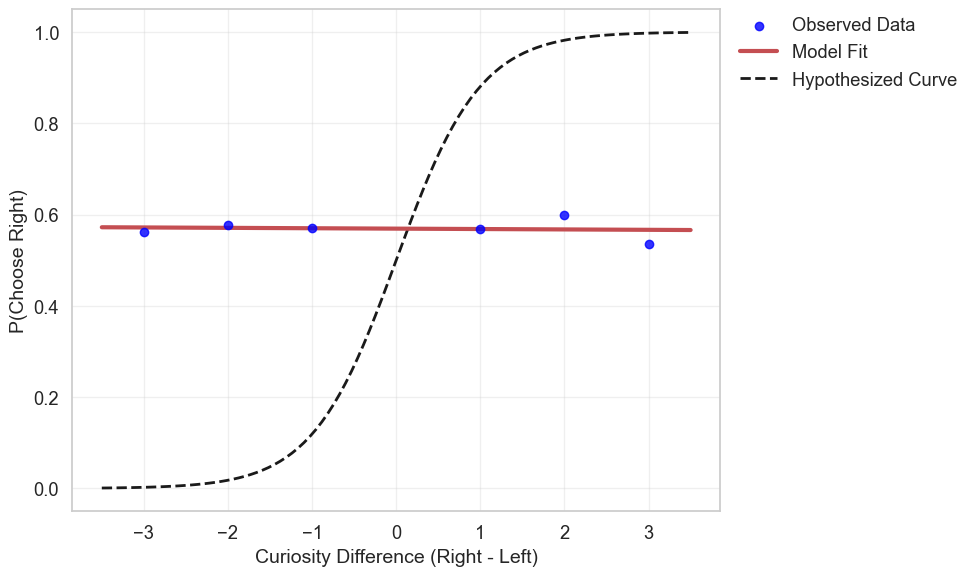

In [687]:
# plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# plot raw data points, jitter x values for easier visualization
#x_jittered = all_choice_data['r_min_l'] + np.random.normal(0, 0.05, len(all_choice_data))
#plt.scatter(x_jittered, all_choice_data['choose_r'], alpha=0.4, color='blue', label='Observed Data')

# plot avg proportion choose right for each R-L value
avg_pchooser_df = all_choice_data.copy()
avg_pchooser_df = avg_pchooser_df[['r_min_l', 'choose_r']]
avg_pchooser_df = avg_pchooser_df.groupby('r_min_l')['choose_r'].mean().reset_index()
plt.scatter(avg_pchooser_df['r_min_l'], avg_pchooser_df['choose_r'], alpha=0.8, color='blue', label='Observed Data', zorder=3,)

# add S-curve with predicted y-values from simple logistic model
# use model to predict p choose right based on value difference in curiosity 
x_min = all_choice_data['r_min_l'].min()-0.5
x_max = all_choice_data['r_min_l'].max()+0.5
x_range = np.linspace(x_min, x_max, 100)
pred_df = pd.DataFrame({'r_min_l': x_range})

y_pred_actual = simp_cur_choice_pref_mod.predict(pred_df)
plt.plot(x_range, y_pred_actual, 'r-', linewidth=3, label='Model Fit', zorder=2)

# also graph the expected s-curve
# manually define hypothetical curve parameters
intercept_hyp = 0  
slope_hyp = 2      
y_pred_hyp = expit(intercept_hyp + slope_hyp * x_range)
plt.plot(x_range, y_pred_hyp, 'k--', linewidth=2, label='Hypothesized Curve', zorder=1)


# labels and appearahce
plt.xlabel('Curiosity Difference (Right - Left)', fontsize=14)
plt.ylabel('P(Choose Right)', fontsize=14)
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.show()


#### Psychonomics 2025 (Hedden & Bakkour) poster

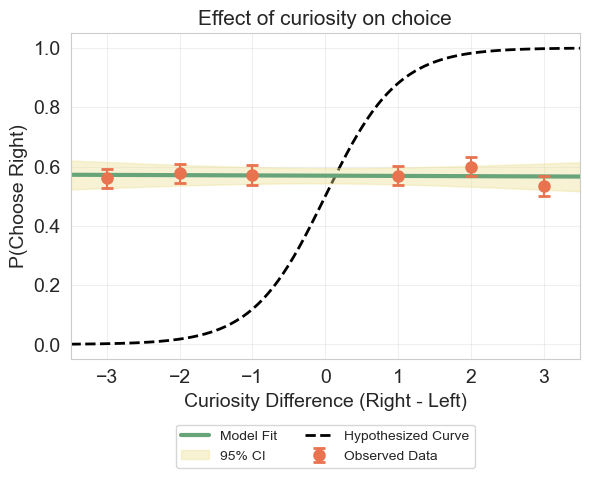

In [172]:
# plot style
plt.figure(figsize=(6, 5))
sns.set_style("whitegrid")


# define custom colors
data_color = '#E9724F' 
model_color = '#67A479'
ci_color = '#ECE094'


# plot average proportion choose right for each R-L value with error bars
avg_pchooser_df = all_choice_data.copy()
avg_pchooser_df = avg_pchooser_df[['r_min_l', 'choose_r']]
avg_pchooser_df = avg_pchooser_df.groupby('r_min_l').agg({'choose_r': ['mean', 'sem']}).reset_index()
avg_pchooser_df.columns = ['r_min_l', 'mean', 'sem']

plt.errorbar(
    avg_pchooser_df['r_min_l'], 
    avg_pchooser_df['mean'],       
    yerr=avg_pchooser_df['sem'], # error bars (±SEM)
    fmt='o', # circle markers
    color=data_color,                 
    ecolor=data_color,                
    alpha=1, # fully opaque
    markersize=8, # point size
    capsize=4, # width of error bar caps
    capthick=2, # thickness of caps
    label='Observed Data',
    zorder=3 # draw on top
)


# add model prediction line and confidence bands
# define x-range for prediction
x_min = all_choice_data['r_min_l'].min() - 0.5
x_max = all_choice_data['r_min_l'].max() + 0.5
x_range = np.linspace(x_min, x_max, 300)
pred_df = pd.DataFrame({'r_min_l': x_range})

# get model predictions and confidence intervals
predictions = simp_cur_choice_pref_mod.get_prediction(pred_df)
pred_summary = predictions.summary_frame(alpha=0.05)
y_pred_actual = pred_summary["mean"]
ci_lower = pred_summary["mean_ci_lower"]
ci_upper = pred_summary["mean_ci_upper"]

# plot model fit curve
plt.plot(x_range, y_pred_actual, '-', linewidth=3, color=model_color, label='Model Fit', zorder=2)

# plot confidence bands
plt.fill_between(x_range, ci_lower, ci_upper, color=ci_color, alpha=0.4, label='95% CI', zorder=1.5)


# plot hypothetical curve
intercept_hyp = 0
slope_hyp = 2
y_pred_hyp = expit(intercept_hyp + slope_hyp * x_range)
plt.plot(x_range, y_pred_hyp, 'k--', linewidth=2, label='Hypothesized Curve', zorder=1)


# labels and appearance
plt.xlabel('Curiosity Difference (Right - Left)', fontsize=14)
plt.ylabel('P(Choose Right)', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0)
plt.title('Effect of curiosity on choice', fontsize=15)
plt.tight_layout()
plt.show()




/var/folders/cl/dyx4rnd54ng0d55bnxrkvyd00000gr/T/ipykernel_46386/2221099064.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_range, y_pred_actual, 'r-', linewidth=3, color=model_color, label='Model Fit', zorder=2)


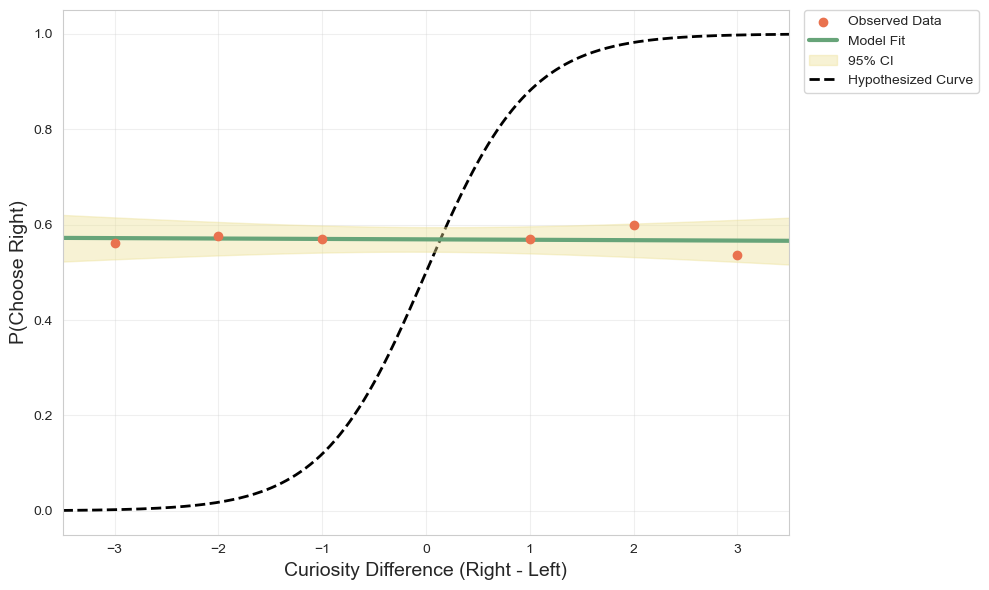

In [153]:
# plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# define custom colors
data_color = '#E9724F' 
model_color = '#67A479'
ci_color = '#ECE094'


# plot average proportion choose right for each R-L value
avg_pchooser_df = all_choice_data.copy()
avg_pchooser_df = avg_pchooser_df[['r_min_l', 'choose_r']]
avg_pchooser_df = avg_pchooser_df.groupby('r_min_l')['choose_r'].mean().reset_index()

plt.scatter(
    avg_pchooser_df['r_min_l'],
    avg_pchooser_df['choose_r'],
    alpha=1,
    color=data_color,
    label='Observed Data',
    zorder=3
)


# add model prediction line and confidence bands
# define x-range for prediction
x_min = all_choice_data['r_min_l'].min() - 0.5
x_max = all_choice_data['r_min_l'].max() + 0.5
x_range = np.linspace(x_min, x_max, 300)
pred_df = pd.DataFrame({'r_min_l': x_range})

# get model predictions and confidence intervals
predictions = simp_cur_choice_pref_mod.get_prediction(pred_df)
pred_summary = predictions.summary_frame(alpha=0.05)

y_pred_actual = pred_summary["mean"]
ci_lower = pred_summary["mean_ci_lower"]
ci_upper = pred_summary["mean_ci_upper"]

# plot model fit curve
plt.plot(x_range, y_pred_actual, 'r-', linewidth=3, color=model_color, label='Model Fit', zorder=2)

# plot confidence bands
plt.fill_between(x_range, ci_lower, ci_upper, color=ci_color, alpha=0.4, label='95% CI', zorder=1.5)


# plot hypothetical curve
intercept_hyp = 0
slope_hyp = 2
y_pred_hyp = expit(intercept_hyp + slope_hyp * x_range)
plt.plot(x_range, y_pred_hyp, 'k--', linewidth=2, label='Hypothesized Curve', zorder=1)

# labels and appearance
plt.xlabel('Curiosity Difference (Right - Left)', fontsize=14)
plt.ylabel('P(Choose Right)', fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.show()


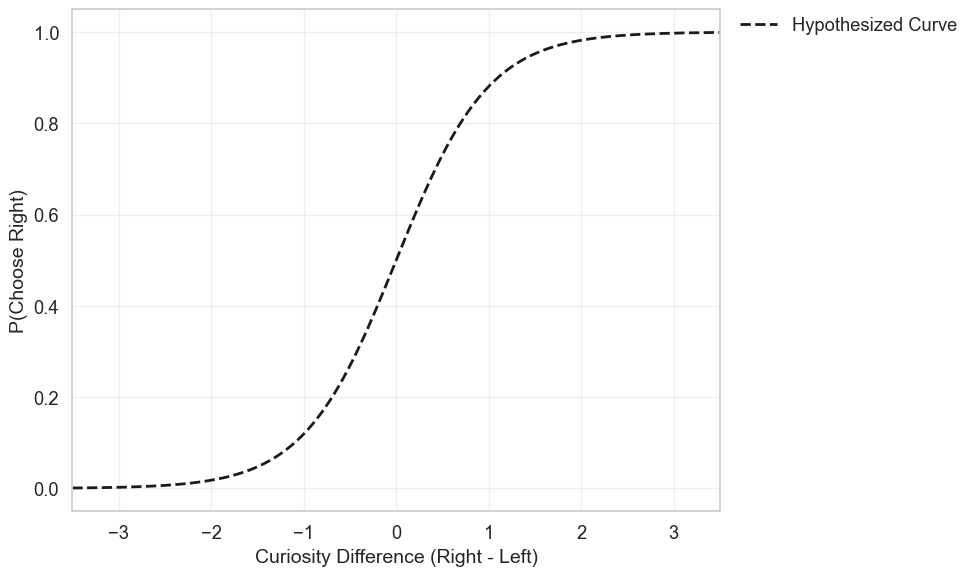

In [690]:
# create graph of just the expected S-curve should results be significant (for presentation purposes)
# plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# also graph the expected s-curve
# manually define hypothetical curve parameters
intercept_hyp = 0  
slope_hyp = 2      
y_pred_hyp = expit(intercept_hyp + slope_hyp * x_range)
plt.plot(x_range, y_pred_hyp, 'k--', linewidth=2, label='Hypothesized Curve')

# labels and appearahce
plt.xlabel('Curiosity Difference (Right - Left)', fontsize=14)
plt.ylabel('P(Choose Right)', fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.show()